# Package import

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import random
import timeit
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import string
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import resample
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
random.seed(9001) # For Reproducibility of Results
%matplotlib inline

pd.set_option('display.max_rows', 300)

# Data Load

In [26]:
#NOMIS - CENSUS DATA - DIMENSIONS
population = pd.read_csv('postcodeSector/populationCount.csv', skiprows=8) # 8039*8
ethnicMinority = pd.read_csv('postcodeSector/Ethnic.csv', skiprows=8)  # 8039*96
ageStructure = pd.read_csv('postcodeSector/ageStructure.csv', skiprows=8) #8039*20
relationalSituation = pd.read_csv('postcodeSector/relational.csv', skiprows=8) #8039*8
livingArrangements = pd.read_csv('postcodeSector/livingArrangements.csv', skiprows=8) #8039*9
householdComposition = pd.read_csv('postcodeSector/householdComposition.csv', skiprows=8) #8039*23
notInEmploymentDependencies = pd.read_csv('postcodeSector/notInEmploymentDependencies.csv', skiprows=8) #8039*10
loneParentDependencies = pd.read_csv('postcodeSector/loneParentDependencies.csv', skiprows=8)#8039*13
ethnicGroup = pd.read_csv('postcodeSector/ethnicGroup.csv', skiprows=8) #8039*25
industry = pd.read_csv('postcodeSector/industry.csv', skiprows=8)#8039*26
tenure = pd.read_csv('postcodeSector/tenure.csv', skiprows=8) #8039*8
hoursWorked = pd.read_csv('postcodeSector/hoursWorked.csv', skiprows=8) #8039*6
dwelling = pd.read_csv('postcodeSector/dwelling.csv', skiprows=8) #8039*5
englishProf = pd.read_csv('postcodeSector/englishProf.csv', skiprows=8) #8039*7
centralHeating = pd.read_csv('postcodeSector/centralHeating.csv', skiprows=8) #8039*9
passportHeld = pd.read_csv('postcodeSector/passportHeld.csv', skiprows=7) #8039*73
birthCountry = pd.read_csv('postcodeSector/birthCountry.csv', skiprows=8) #8039*9
religion = pd.read_csv('postcodeSector/religion.csv', skiprows=8) #8063*12
generalHealth = pd.read_csv('postcodeSector/generalHealth.csv', skiprows=8) #8039*7
yearLastWorked = pd.read_csv('postcodeSector/yearLastWorked.csv', skiprows=8) #8039*13
householdSize = pd.read_csv('postcodeSector/householdSize.csv', skiprows=8) #8039*10
carOrVanAvailability = pd.read_csv('postcodeSector/carOrVanAvailability.csv', skiprows=8) #8039*7
distanceTravelledtoWork = pd.read_csv('postcodeSector/distanceTravelledtoWork.csv', skiprows=8) #8039*14
methodofTraveltoWork = pd.read_csv('postcodeSector/methodofTraveltoWork.csv', skiprows=8) #8039*14
ageofArrival = pd.read_csv('postcodeSector/ageofArrival.csv', skiprows=8) #8039*19
lengthofResidence = pd.read_csv('postcodeSector/lengthofResidence.csv', skiprows=8) #8039*7
occupationType = pd.read_csv('postcodeSector/occupation.csv', skiprows=8) #8039*11
mainLanguage = pd.read_csv('postcodeSector/mainLanguage.csv', skiprows=8) #8039*105
bedrooms = pd.read_csv('postcodeSector/bedrooms.csv', skiprows=8) #8039*8
longTermDisability = pd.read_csv('postcodeSector/longTermDisability.csv', skiprows=8) #8039*5
economicActivity = pd.read_csv('postcodeSector/economicActivity.csv', skiprows=8) #8039*17
positionInCommunalEstablishment = pd.read_csv('postcodeSector/positionInCommunalEstablishment.csv', skiprows=8) #8039*5
accomType = pd.read_csv('postcodeSector/accomType.csv', skiprows=8) #8039*13
secondAddress = pd.read_csv('postcodeSector/secondAddress.csv', skiprows=8) #8039*6
formerIndustry = pd.read_csv('postcodeSector/formerIndustry.csv', skiprows=8) #8039*11
formerOccupation = pd.read_csv('postcodeSector/formerOccupation.csv', skiprows=8) #8039*12


religion = religion.drop(religion.index[-24:]) # line added due to notes at bottom of CSV

qualification = pd.read_csv('postcodeSector/qualification.csv', skiprows=8) #8039*14   # AS A PROPORTION ONLY 


In [27]:
qualification

postcode sector                                  No qualifications  \
0             AL1  1                                                9.4   
1             AL1  2                                               20.4   
2             AL1  3                                                8.8   
3             AL1  4                                                6.5   
4             AL1  5                                               15.4   
5             AL10 0                                               22.9   
6             AL10 8                                               18.9   
7             AL10 9                                                9.1   
8             AL2  1                                               16.7   
9             AL2  2                                               18.0   
10            AL2  3                                               16.9   
11            AL3  4                                                7.7   
12            AL3  5                                               12.9   
13            AL3  6                                               18.2   
14            AL3  7                                               17.2   
15            AL3  8                                               16.6   
16            AL4  0                                               12.4   
17            AL4  8                                               12.7   
18            AL4  9                                               13.2   
19            AL5  1                                               11.0   
20            AL5  2                                                7.5   
21            AL5  3                                                6.4   
22            AL5  4                                               11.1   
23            AL5  5                                               10.8   
24            AL6  0                                               10.9   
25            AL6  9                                               18.2   
26            AL7  1                                               20.4   
27            AL7  2                                               17.7   
28            AL7  3                                               22.8   
29            AL7  4                                               20.1   
30            AL8  6                                               15.6   
31            AL8  7                                               15.0   
32            AL9  5                                               12.3   
33            AL9  6                                               21.3   
34            AL9  7                                               17.6   
35            B1   1                                                6.5   
36            B1   2                                               16.1   
37            B1   3                                                3.8   
38            B10  0                                               38.7   
39            B10  9                                               38.7   
40            B11  1                                               40.0   
41            B11  2                                               34.5   
42            B11  3                                               33.9   
43            B11  4                                               35.2   
44            B12  0                                               27.2   
45            B12  8                                               36.6   
46            B12  9                                               34.5   
47            B13  0                                               29.3   
48            B13  8                                               16.2   
49            B13  9                                               21.2   
50            B14  4                                               31.1   
51            B14  5                                               36.9   
52            B14  6          

# Set up classification problem

In [28]:
qualification.drop(qualification.columns[[1,2,3,4,5,7,8,9,10,11,12]], axis=1, inplace=True)
qualification = qualification.rename(index=str, columns={"Highest level of qualification: Level 4 qualifications and above": "target"})

In [29]:
qualification.quantile(0.7) # Check to see where 70 percent quartile is to setup class imbalance

target    33.2
Name: 0.7, dtype: float64

In [30]:
# Assign a 1 or a zero as a output depending on whether proportion of people have, or don't have a higher education degree
qualification['classification'] = np.where(qualification['target']>=33.2, 1, 0) 

#Check
values = qualification.groupby('classification').count()
values['perc']= values['target']/values['target'].sum()
values

postcode sector  target     perc
classification                                  
0                          5620    5620  0.69944
1                          2415    2415  0.30056

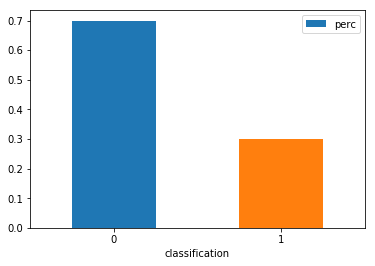

In [31]:
ax = values.plot.bar(y = 'perc',rot=0, )

# Combine datasets

In [32]:
###Merge different datasets
newDF = [population, ethnicMinority, ageStructure, relationalSituation, livingArrangements, householdComposition,notInEmploymentDependencies,loneParentDependencies,ethnicGroup,industry,tenure, hoursWorked,dwelling,englishProf,centralHeating,passportHeld,birthCountry,religion,generalHealth,yearLastWorked,householdSize,carOrVanAvailability,distanceTravelledtoWork,methodofTraveltoWork,ageofArrival,lengthofResidence,occupationType,mainLanguage,bedrooms,longTermDisability,economicActivity,positionInCommunalEstablishment,accomType,secondAddress,formerIndustry,formerOccupation,qualification]
newDF2 = pd.concat([i.set_index('postcode sector') for i in newDF],axis=1, join='outer')

In [33]:
#Check for dimensions
newDF2.shape

(8039, 735)

In [34]:
#drop rows without any information
newDF3 = newDF2.dropna()
newDF3.shape

(8035, 735)

In [35]:
#drop duplicate columns arising from merging...
newDF4 = newDF3.T.drop_duplicates().T

In [36]:
#remove spaces from variable names to allow access to columns
newDF4.columns = newDF4.columns.map(lambda x: x.replace(' ', '_'))

# Splitting data into Train, Test and Validation

In [37]:
featuresforTraining = newDF4.drop(['target','classification'], axis=1)

In [38]:
#Define function for splitting data
def validationTrainTestSplit(featuresforTraining, newDF4):#Splits data into 60-20-20 spilt 
    X_train1, X_test, y_train1, y_test = train_test_split(featuresforTraining, newDF4.classification, random_state=0, test_size=.2)
    X_train, X_validation, y_train,y_validation = train_test_split(X_train1, y_train1, random_state=0, test_size=.25)
    
    return X_train, X_test, X_validation, y_train, y_validation,y_test

In [39]:
#Execute function for splitting data
X_train, X_test, X_validation, y_train, y_validation,y_test = validationTrainTestSplit(featuresforTraining,newDF4)

In [40]:
#Check to see if 60-20-20 split correct
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(4821, 704)
(1607, 704)
(1607, 704)


In [41]:
y_train=y_train.astype('int')
y_test = y_test.astype('int')
y_validation = y_validation.astype('int')

# Feature Selection Stage

In [42]:
#Select about 70 features
select = SelectPercentile(percentile=10)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

In [43]:
#check to see if reduction is correctly executed
print("The shape of X_train is:  ",  X_train.shape)
print("The shape of X_train_selected is:  ",  X_train_selected.shape)

The shape of X_train is:   (4821, 704)
The shape of X_train_selected is:   (4821, 71)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False  True False False False False False False False False False False
 False False  True  True  True  True False False False False False False
  True  True False False False  True  True  True  T

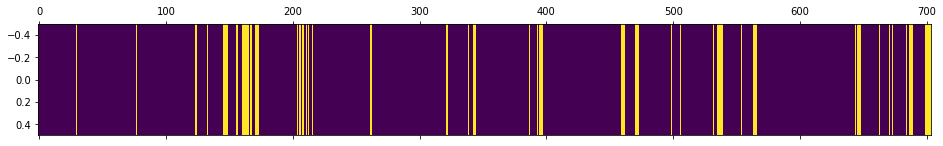

In [44]:
#Array creation of features selected, as well as graphical representation
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),aspect='auto')

In [45]:
#Apply feature reduction to Validation and test set
X_validation_selected = select.transform(X_validation)
X_test_selected = select.transform(X_test)

# Selected Features

In [46]:
selectedVariables = X_train.columns[select.get_support()]


In [47]:
for i in selectedVariables:
    print(i)

Australian/New_Zealander
Other_Western_European
Divorced_or_formerly_in_a_same-sex_civil_partnership_which_is_now_legally_dissolved
Not_living_in_a_couple:_Widowed_or_surviving_partner_from_a_same-sex_civil_partnership
One_family_only:_Cohabiting_couple:_Dependent_children
One_family_only:_Cohabiting_couple:_All_children_non-dependent
One_family_only:_Lone_parent
One_family_only:_Lone_parent:_Dependent_children
No_adults_in_employment_in_household
No_adults_in_employment_in_household:_With_dependent_children
One_person_in_household_with_a_long-term_health_problem_or_disability
One_person_in_household_with_a_long-term_health_problem_or_disability:_With_dependent_children
One_person_in_household_with_a_long-term_health_problem_or_disability:_No_dependent_children
All_lone_parent_housholds_with_dependent_children
Lone_parent_in_part-time_employment:_Total
Lone_parent_not_in_employment:_Total
Male_lone_parent:_Total
Male_lone_parent:_Not_in_employment
Female_lone_parent:_Total
Female_lone_

# Logistic Regression with Cross Validation

In [24]:
#Function for hyperparameter tuning
def hyperparameterTuneLogistic(i,j,X_train,y_train,X_test,y_test):
    print("        C =" + str(i) + "          Maximum Iterations =" + str(j))
#DEFINE MODEL
    logreg = LogisticRegression(C=i,max_iter=j,class_weight='balanced',random_state=123)
#TRAIN MODEL
    logreg.fit(X_train, y_train)
#Make Predictions
    y_pred = logreg.predict(X_test)
    
    
#PRINT METRICS
    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    

    return

In [25]:
#HYPERPARAMETER TUNE
CValue = [0.001,0.0005,0.0001,0.01,0.5,0.1,0.5]
maxIterations = [50,100,150,200,250,300] 

        C =0.001          Maximum Iterations =50
CONFUSION MATRIX:   
[[1069   60]
 [  16  462]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      1129
          1       0.89      0.97      0.92       478

avg / total       0.96      0.95      0.95      1607

ROC CURVE


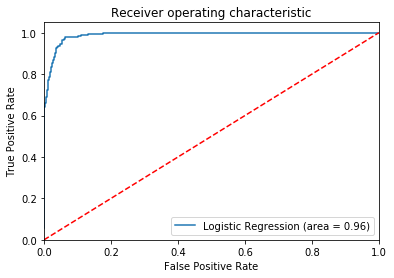

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =100
CONFUSION MATRIX:   
[[1069   60]
 [  16  462]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      1129
          1       0.89      0.97      0.92       478

avg / total       0.96      0.95      0.95      1607

ROC CURVE


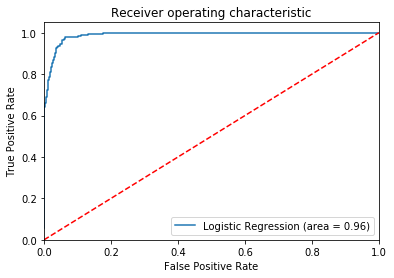

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =150
CONFUSION MATRIX:   
[[1069   60]
 [  16  462]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      1129
          1       0.89      0.97      0.92       478

avg / total       0.96      0.95      0.95      1607

ROC CURVE


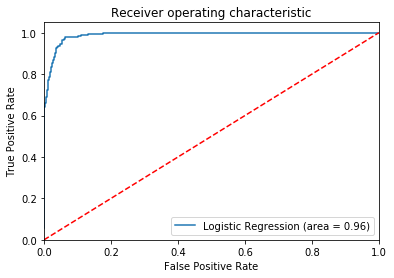

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =200
CONFUSION MATRIX:   
[[1069   60]
 [  16  462]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      1129
          1       0.89      0.97      0.92       478

avg / total       0.96      0.95      0.95      1607

ROC CURVE


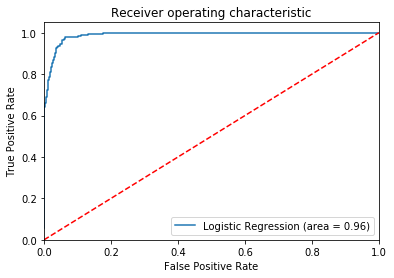

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =250
CONFUSION MATRIX:   
[[1069   60]
 [  16  462]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      1129
          1       0.89      0.97      0.92       478

avg / total       0.96      0.95      0.95      1607

ROC CURVE


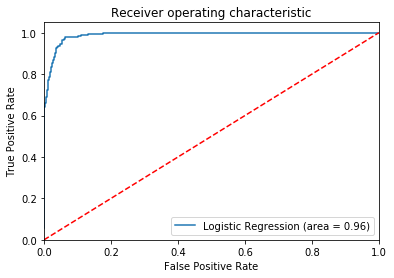

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =300
CONFUSION MATRIX:   
[[1069   60]
 [  16  462]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      1129
          1       0.89      0.97      0.92       478

avg / total       0.96      0.95      0.95      1607

ROC CURVE


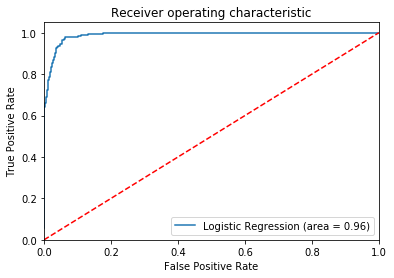

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =50
CONFUSION MATRIX:   
[[1068   61]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


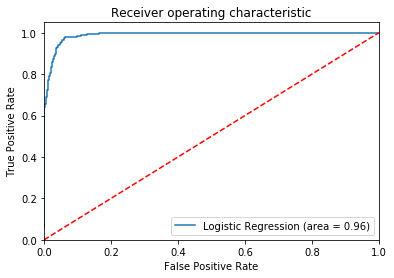

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =100
CONFUSION MATRIX:   
[[1068   61]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


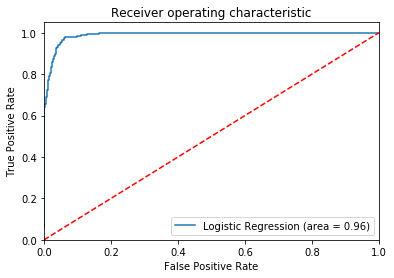

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =150
CONFUSION MATRIX:   
[[1068   61]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


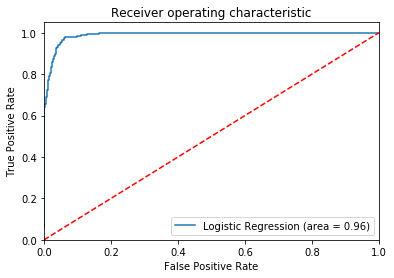

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =200
CONFUSION MATRIX:   
[[1068   61]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


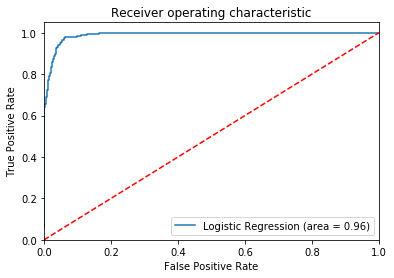

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =250
CONFUSION MATRIX:   
[[1068   61]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


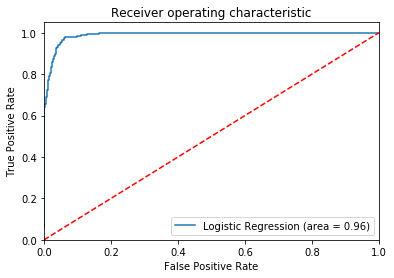

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =300
CONFUSION MATRIX:   
[[1068   61]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


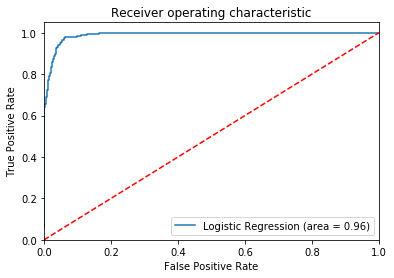

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =50
CONFUSION MATRIX:   
[[1068   61]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


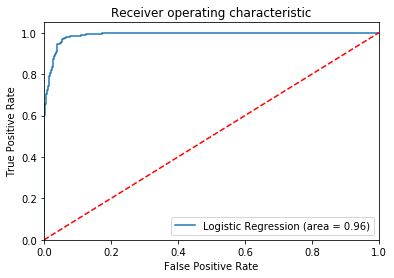

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =100
CONFUSION MATRIX:   
[[1068   61]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


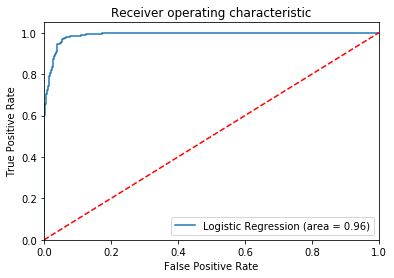

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =150
CONFUSION MATRIX:   
[[1068   61]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


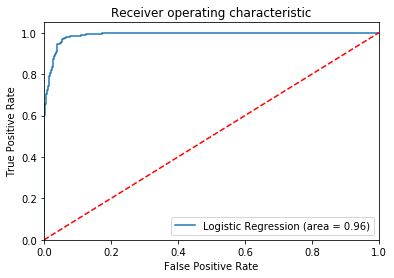

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =200
CONFUSION MATRIX:   
[[1068   61]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


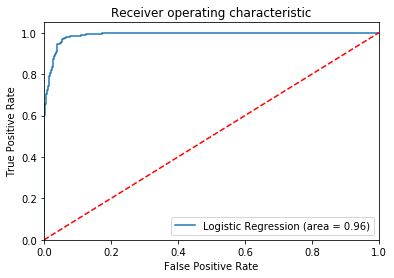

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =250
CONFUSION MATRIX:   
[[1068   61]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


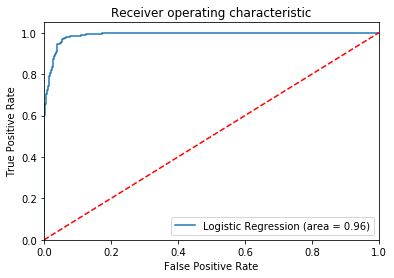

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =300
CONFUSION MATRIX:   
[[1068   61]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


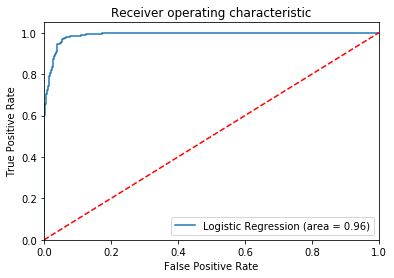

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =50
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


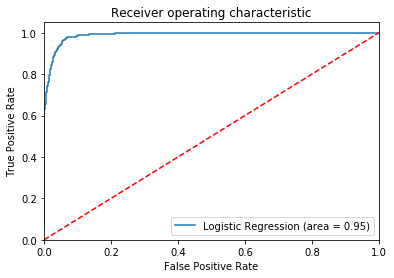

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =100
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


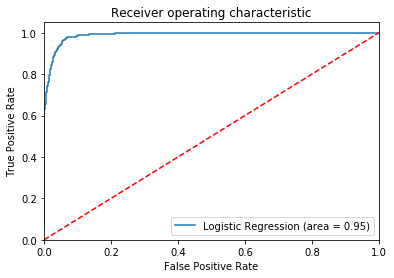

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =150
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


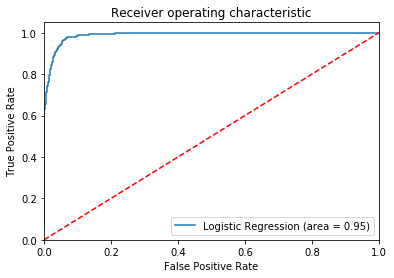

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =200
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


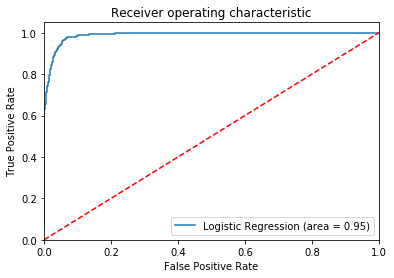

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =250
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


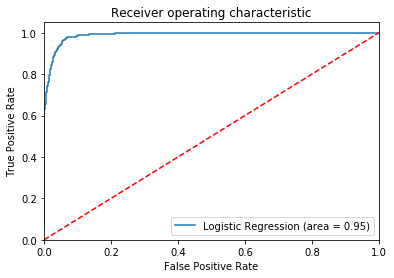

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =300
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


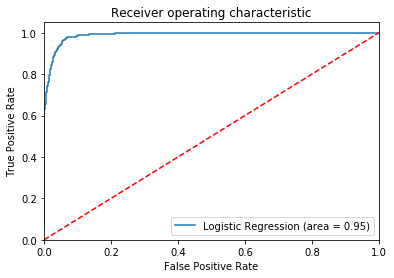

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =50
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


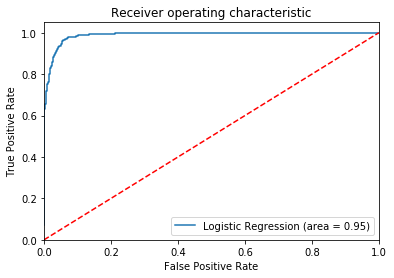

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =100
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


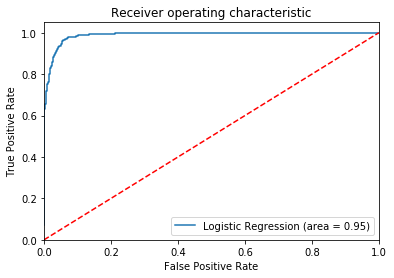

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =150
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


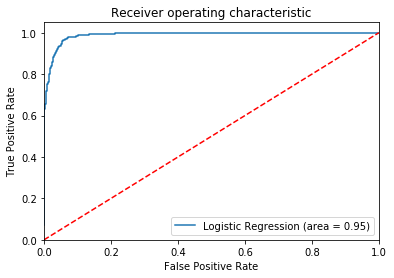

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =200
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


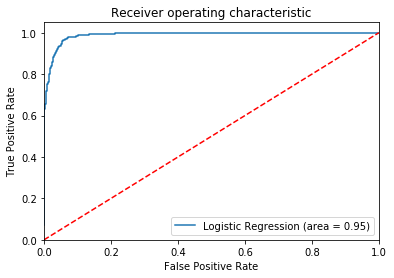

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =250
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


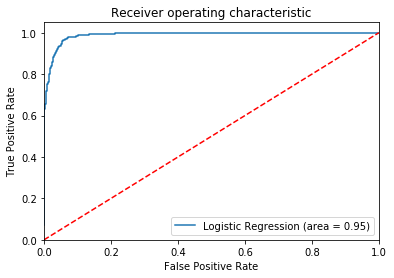

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =300
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


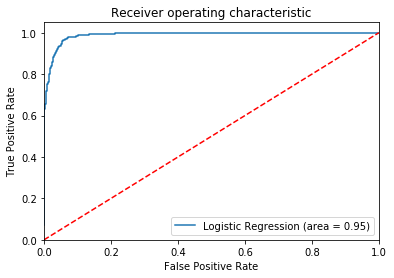

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =50
CONFUSION MATRIX:   
[[1067   62]
 [  19  459]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


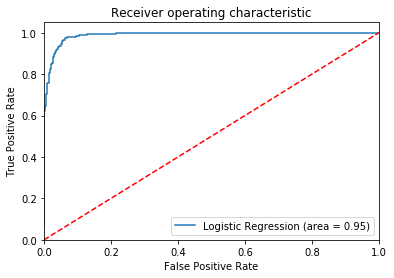

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =100
CONFUSION MATRIX:   
[[1067   62]
 [  19  459]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


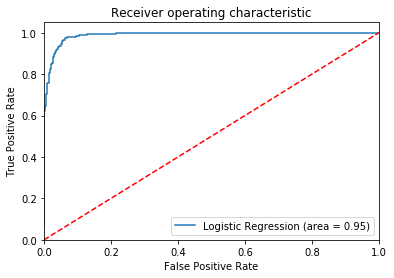

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =150
CONFUSION MATRIX:   
[[1067   62]
 [  19  459]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


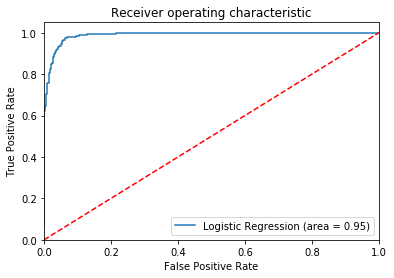

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =200
CONFUSION MATRIX:   
[[1067   62]
 [  19  459]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


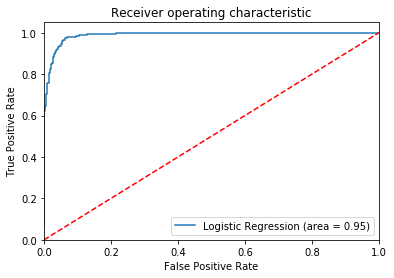

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =250
CONFUSION MATRIX:   
[[1067   62]
 [  19  459]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


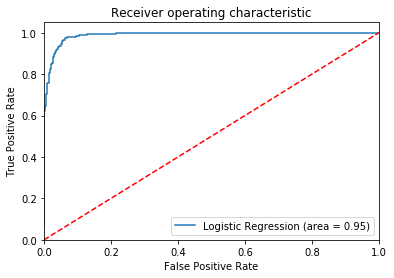

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =300
CONFUSION MATRIX:   
[[1067   62]
 [  19  459]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


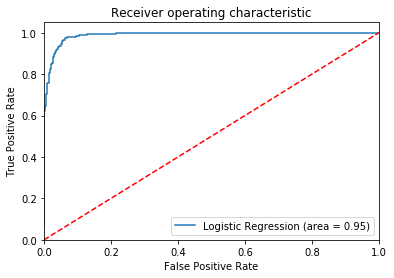

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =50
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


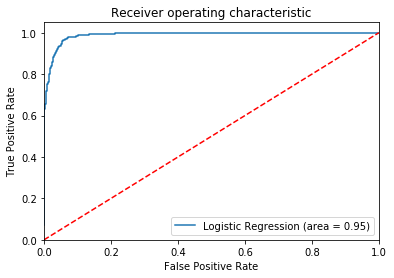

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =100
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


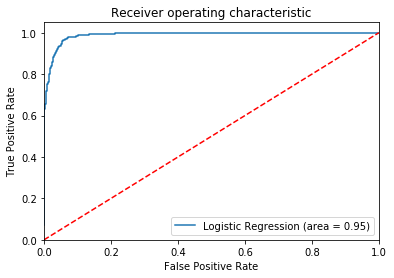

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =150
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


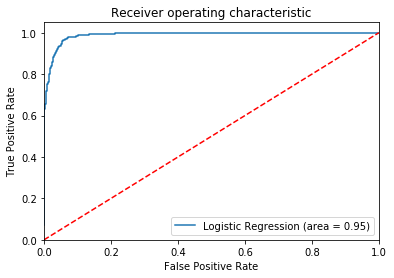

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =200
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


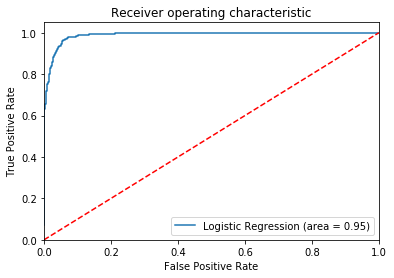

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =250
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


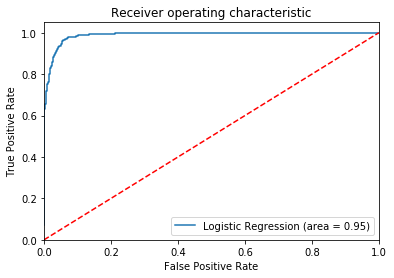

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =300
CONFUSION MATRIX:   
[[1066   63]
 [  17  461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1129
          1       0.88      0.96      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


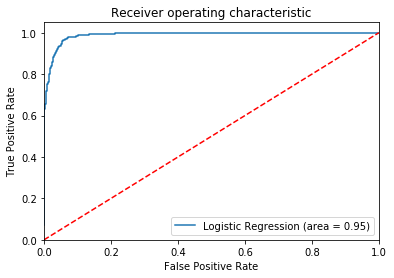

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
17.803048871388107


In [26]:
#RUN LOOP OF ALL PARAMETERS
start_time = timeit.default_timer()
for i in CValue:
    for j in maxIterations:
        hyperparameterTuneLogistic(i,j,X_train_selected, y_train, X_validation_selected, y_validation)
elapsed = timeit.default_timer() - start_time
print(elapsed)

### Logistic Regression

###### OPTIMAL PARAMETERS
###### C = 0.001    max_iter = 50
###### Execution time (17.803 seconds)


# Random Forest with Cross Validation

In [27]:
#HYPER PARAMETER TUNE
Estimators = [10,30,50,80,100,]
maxFeatures = ["auto","sqrt","log2", None ]
maxDepth = [1,10,50,100,150,None]

In [28]:
def hyperparameterTuneRandomForest(i,j,k,X_train,y_train,X_test,y_test):
    print("  Estimators =" + str(i) + "          Maximum Features =" + str(j) + "         Maximum Depth =" + str(k) )
# initiate model
    RandomForest = RandomForestClassifier(n_estimators=i, max_features = j, max_depth = k ,random_state=123, class_weight = 'balanced_subsample')

# train model
    RandomForest.fit(X_train, y_train)

#make predictions
    
    y_pred = RandomForest.predict(X_test)

#print metrics
    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, RandomForest.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, RandomForest.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    return

  Estimators =10          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[769 360]
 [ 85 393]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.68      0.78      1129
          1       0.52      0.82      0.64       478

avg / total       0.79      0.72      0.73      1607

ROC CURVE


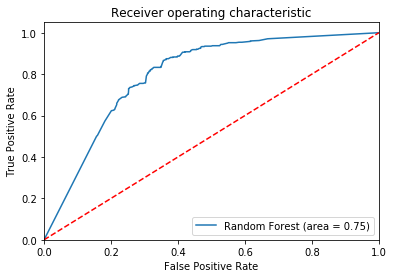

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1055   74]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.93      0.94      1129
          1       0.85      0.85      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


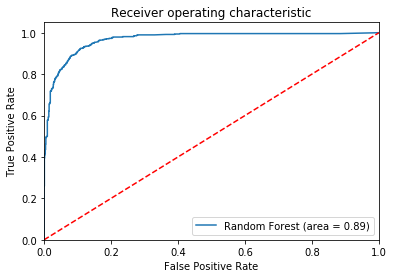

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1084   45]
 [ 105  373]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.94      1129
          1       0.89      0.78      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


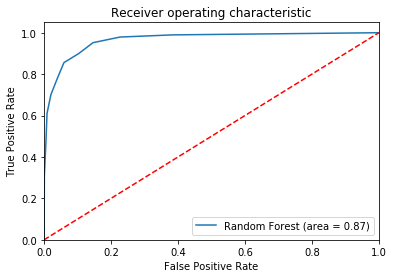

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1084   45]
 [ 105  373]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.94      1129
          1       0.89      0.78      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


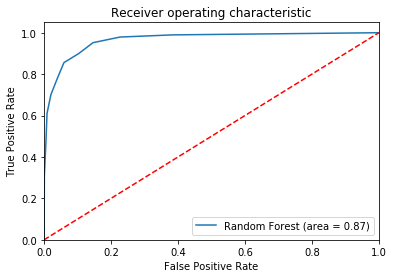

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1084   45]
 [ 105  373]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.94      1129
          1       0.89      0.78      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


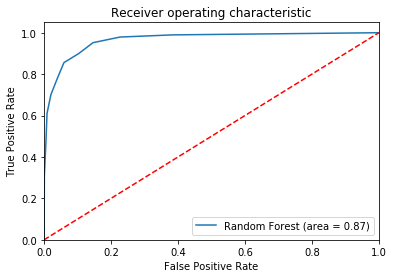

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1084   45]
 [ 105  373]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.94      1129
          1       0.89      0.78      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


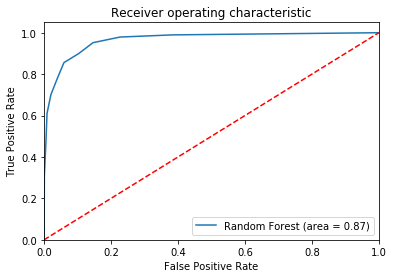

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[769 360]
 [ 85 393]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.68      0.78      1129
          1       0.52      0.82      0.64       478

avg / total       0.79      0.72      0.73      1607

ROC CURVE


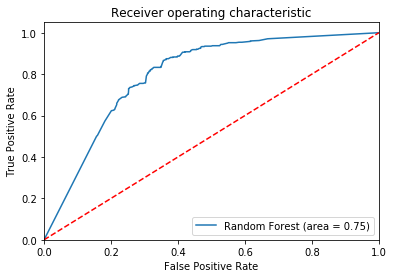

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1055   74]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.93      0.94      1129
          1       0.85      0.85      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


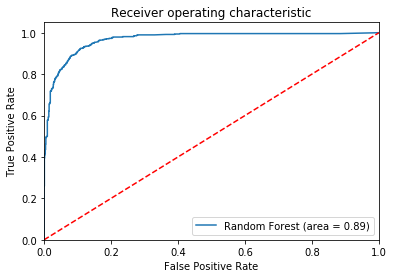

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1084   45]
 [ 105  373]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.94      1129
          1       0.89      0.78      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


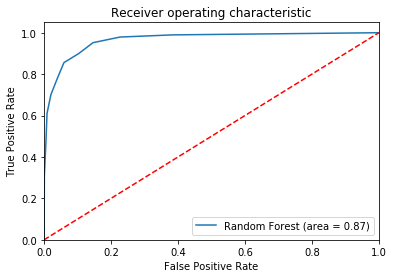

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1084   45]
 [ 105  373]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.94      1129
          1       0.89      0.78      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


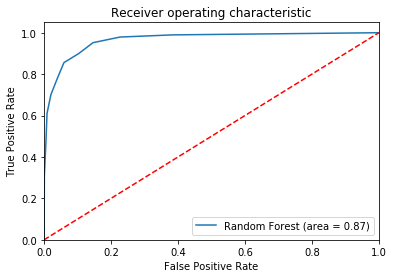

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1084   45]
 [ 105  373]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.94      1129
          1       0.89      0.78      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


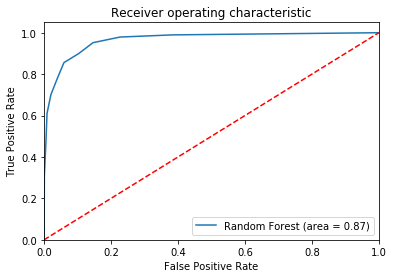

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1084   45]
 [ 105  373]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.94      1129
          1       0.89      0.78      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


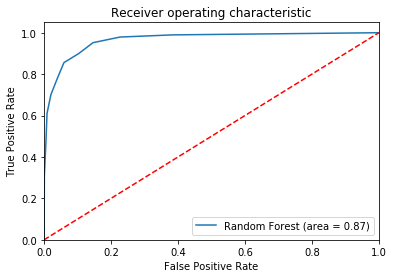

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[752 377]
 [ 88 390]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.67      0.76      1129
          1       0.51      0.82      0.63       478

avg / total       0.78      0.71      0.72      1607

ROC CURVE


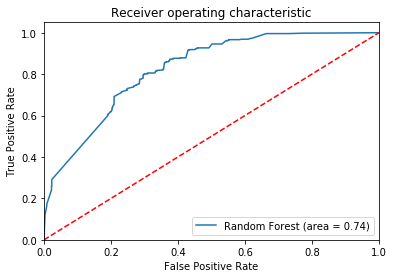

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1066   63]
 [  75  403]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.94      0.94      1129
          1       0.86      0.84      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


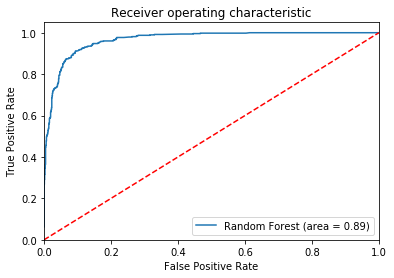

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1083   46]
 [ 106  372]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.93      1129
          1       0.89      0.78      0.83       478

avg / total       0.90      0.91      0.90      1607

ROC CURVE


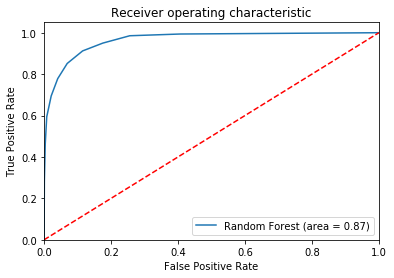

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1083   46]
 [ 106  372]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.93      1129
          1       0.89      0.78      0.83       478

avg / total       0.90      0.91      0.90      1607

ROC CURVE


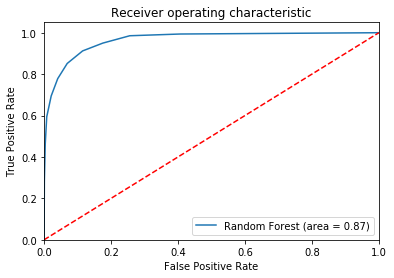

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1083   46]
 [ 106  372]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.93      1129
          1       0.89      0.78      0.83       478

avg / total       0.90      0.91      0.90      1607

ROC CURVE


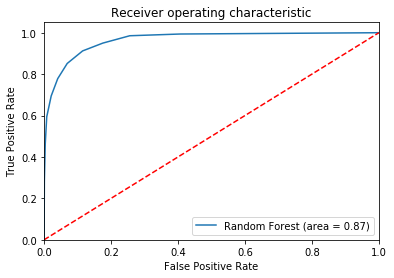

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1083   46]
 [ 106  372]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.93      1129
          1       0.89      0.78      0.83       478

avg / total       0.90      0.91      0.90      1607

ROC CURVE


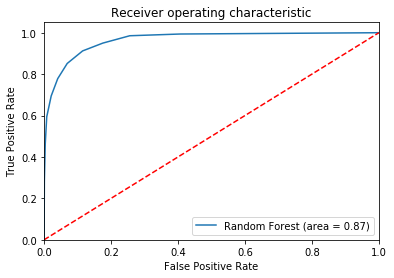

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[827 302]
 [100 378]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.73      0.80      1129
          1       0.56      0.79      0.65       478

avg / total       0.79      0.75      0.76      1607

ROC CURVE


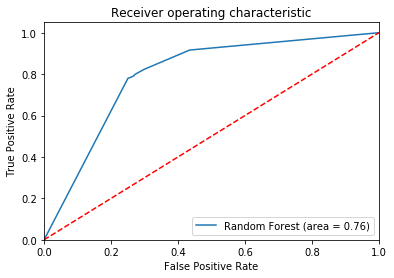

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1065   64]
 [  69  409]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.94      0.94      1129
          1       0.86      0.86      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


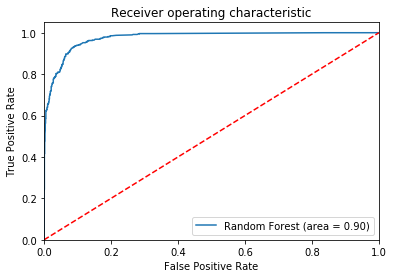

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1084   45]
 [  88  390]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.82      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


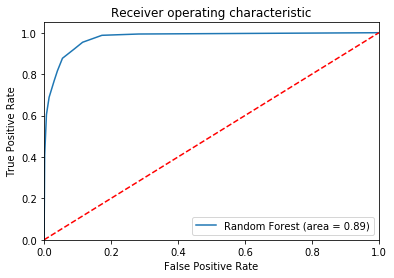

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1084   45]
 [  88  390]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.82      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


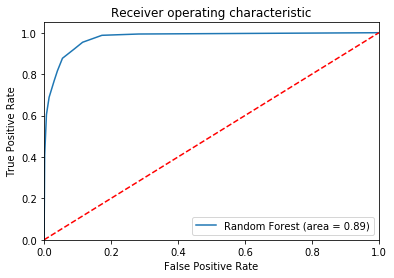

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1084   45]
 [  88  390]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.82      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


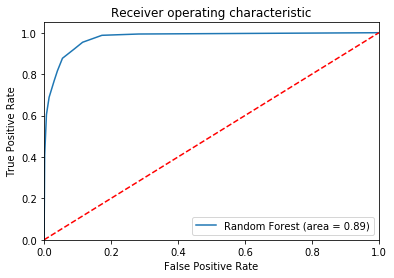

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1084   45]
 [  88  390]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.82      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


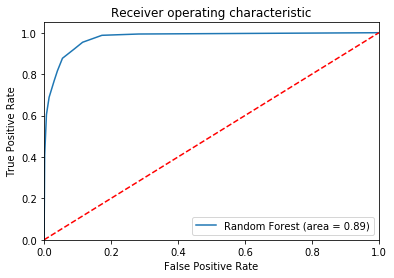

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[765 364]
 [ 78 400]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.68      0.78      1129
          1       0.52      0.84      0.64       478

avg / total       0.79      0.72      0.74      1607

ROC CURVE


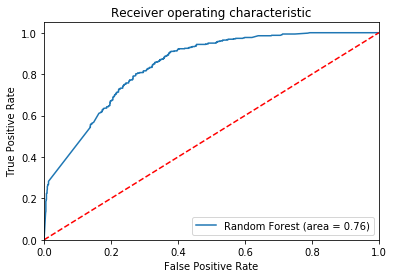

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1067   62]
 [  67  411]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.94      1129
          1       0.87      0.86      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


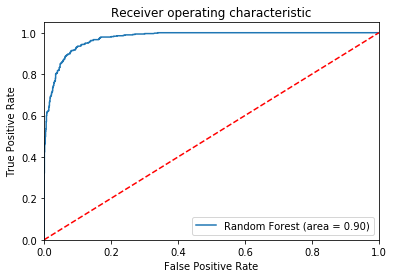

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1096   33]
 [  92  386]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


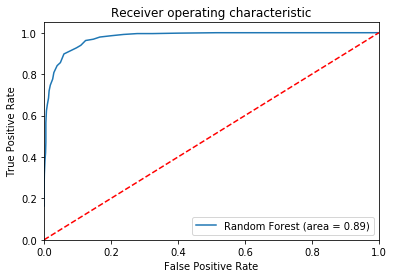

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1096   33]
 [  92  386]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


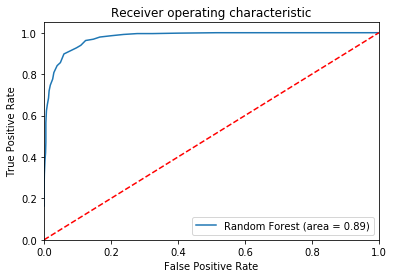

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1096   33]
 [  92  386]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


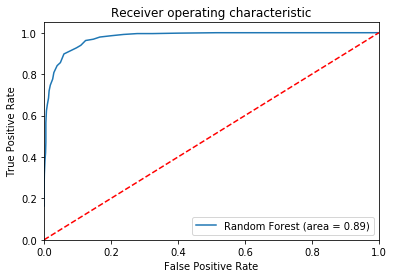

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1096   33]
 [  92  386]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


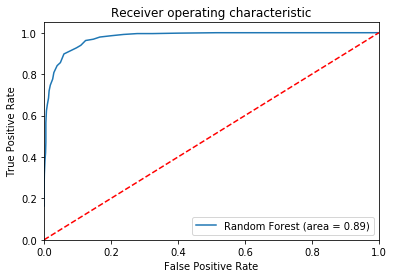

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[765 364]
 [ 78 400]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.68      0.78      1129
          1       0.52      0.84      0.64       478

avg / total       0.79      0.72      0.74      1607

ROC CURVE


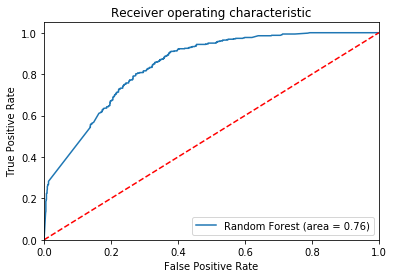

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1067   62]
 [  67  411]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.94      1129
          1       0.87      0.86      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


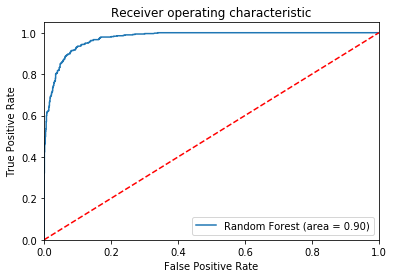

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1096   33]
 [  92  386]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


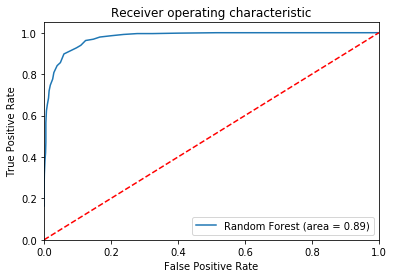

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1096   33]
 [  92  386]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


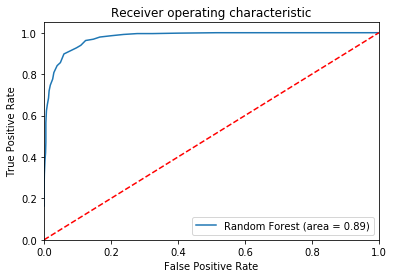

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1096   33]
 [  92  386]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


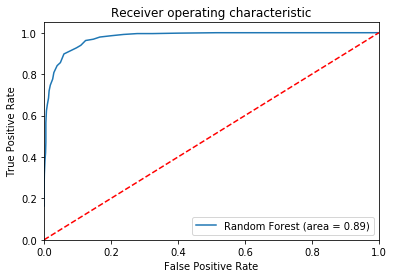

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1096   33]
 [  92  386]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


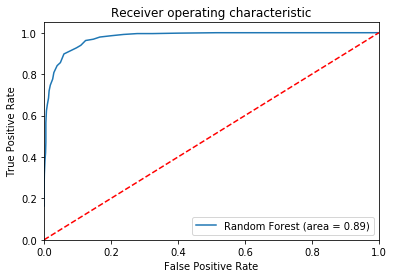

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[773 356]
 [ 77 401]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.68      0.78      1129
          1       0.53      0.84      0.65       478

avg / total       0.80      0.73      0.74      1607

ROC CURVE


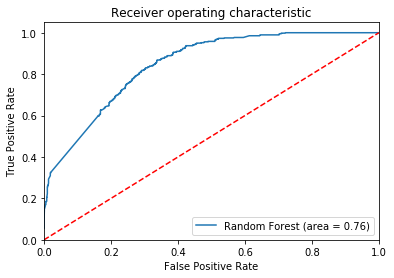

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1062   67]
 [  65  413]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.94      0.94      1129
          1       0.86      0.86      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


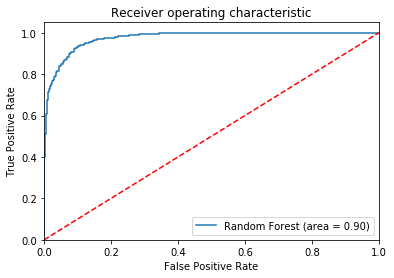

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1090   39]
 [  84  394]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.91      0.82      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


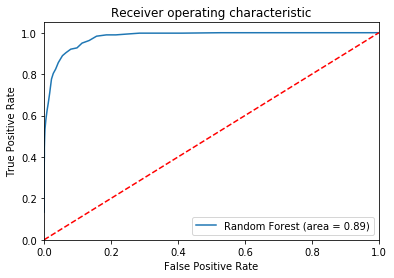

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1090   39]
 [  84  394]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.91      0.82      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


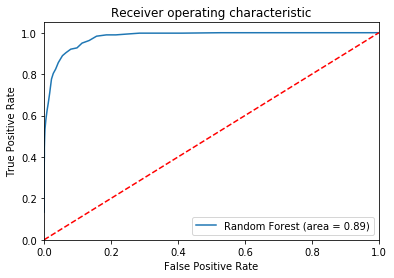

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1090   39]
 [  84  394]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.91      0.82      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


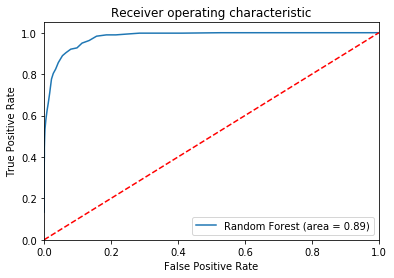

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1090   39]
 [  84  394]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.91      0.82      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


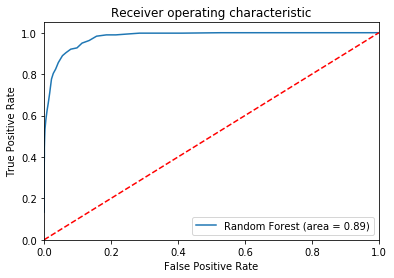

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[824 305]
 [ 97 381]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.73      0.80      1129
          1       0.56      0.80      0.65       478

avg / total       0.79      0.75      0.76      1607

ROC CURVE


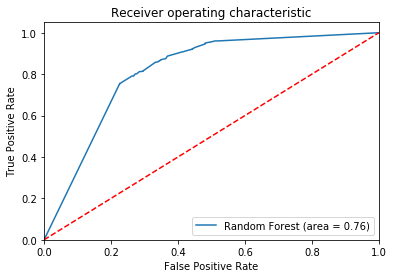

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1081   48]
 [  56  422]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.90      0.88      0.89       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


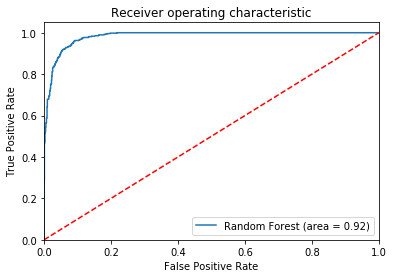

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1089   40]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


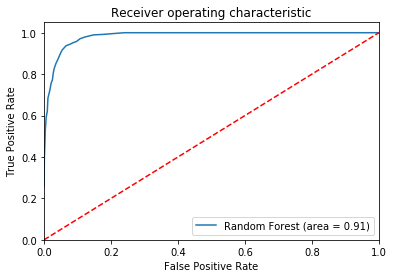

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1089   40]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


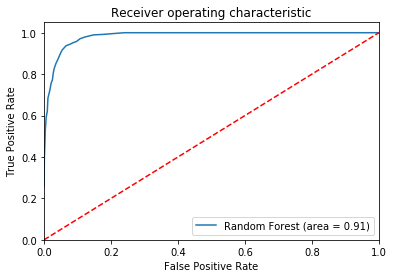

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1089   40]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


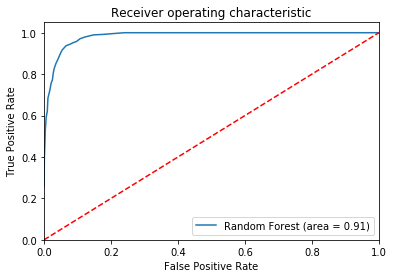

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1089   40]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


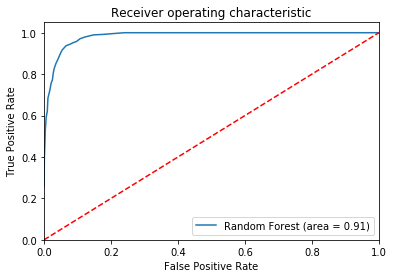

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[777 352]
 [ 81 397]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.69      0.78      1129
          1       0.53      0.83      0.65       478

avg / total       0.79      0.73      0.74      1607

ROC CURVE


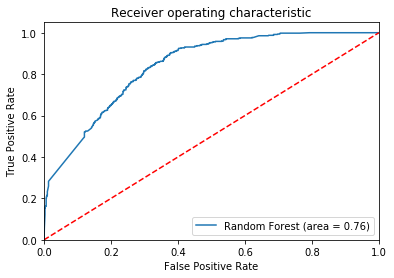

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1068   61]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.95      1129
          1       0.87      0.87      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


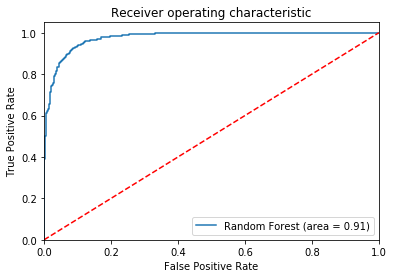

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1094   35]
 [  94  384]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


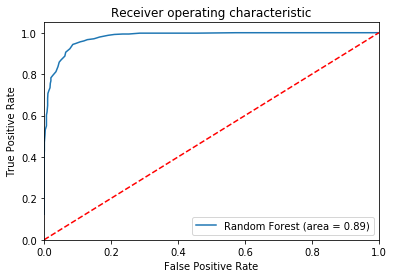

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1094   35]
 [  94  384]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


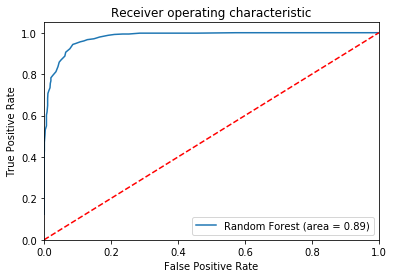

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1094   35]
 [  94  384]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


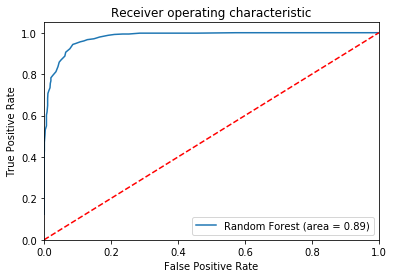

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1094   35]
 [  94  384]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


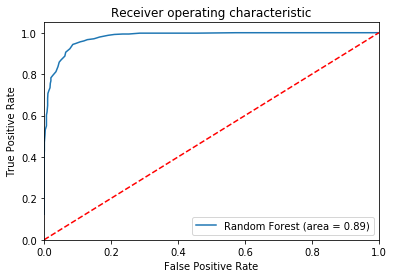

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[777 352]
 [ 81 397]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.69      0.78      1129
          1       0.53      0.83      0.65       478

avg / total       0.79      0.73      0.74      1607

ROC CURVE


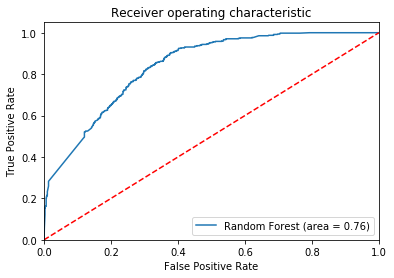

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1068   61]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.95      1129
          1       0.87      0.87      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


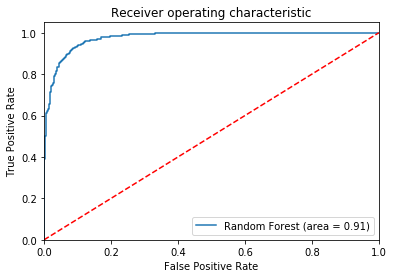

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1094   35]
 [  94  384]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


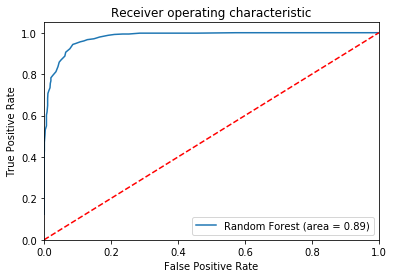

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1094   35]
 [  94  384]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


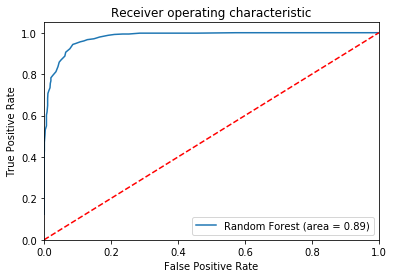

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1094   35]
 [  94  384]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


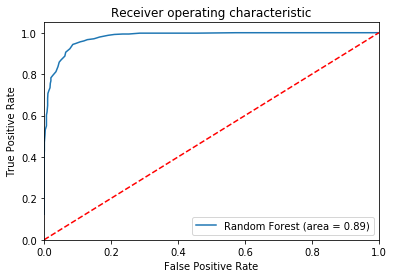

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1094   35]
 [  94  384]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


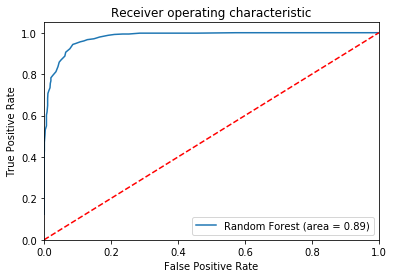

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[774 355]
 [ 79 399]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.69      0.78      1129
          1       0.53      0.83      0.65       478

avg / total       0.79      0.73      0.74      1607

ROC CURVE


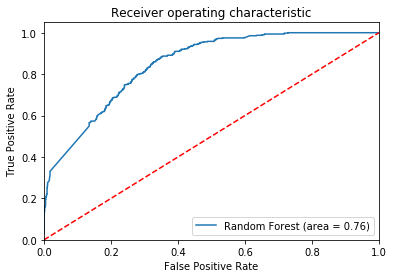

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1065   64]
 [  60  418]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.94      0.94      1129
          1       0.87      0.87      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


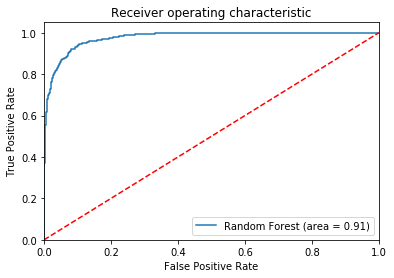

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1090   39]
 [  75  403]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.91      0.84      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


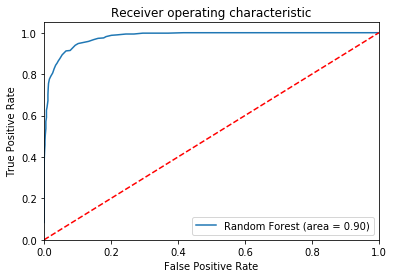

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1090   39]
 [  75  403]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.91      0.84      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


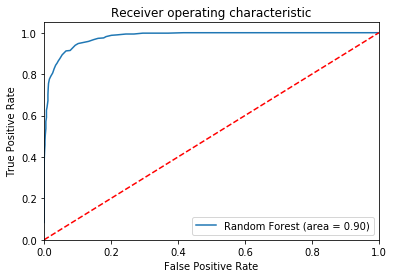

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1090   39]
 [  75  403]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.91      0.84      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


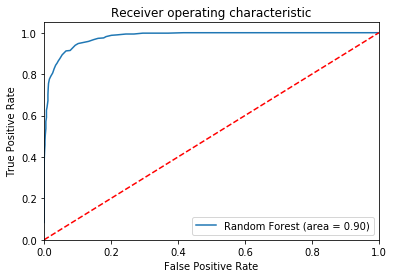

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1090   39]
 [  75  403]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.91      0.84      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


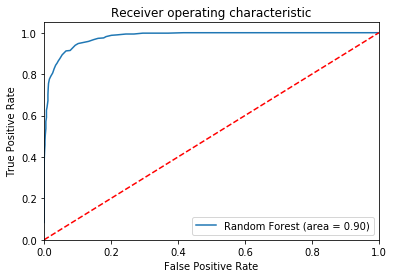

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[821 308]
 [ 95 383]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.73      0.80      1129
          1       0.55      0.80      0.66       478

avg / total       0.79      0.75      0.76      1607

ROC CURVE


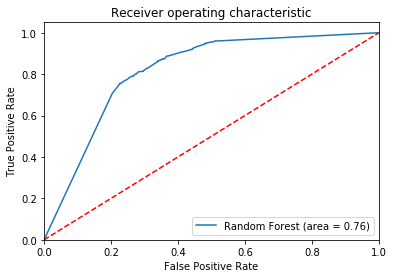

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1084   45]
 [  55  423]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1129
          1       0.90      0.88      0.89       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


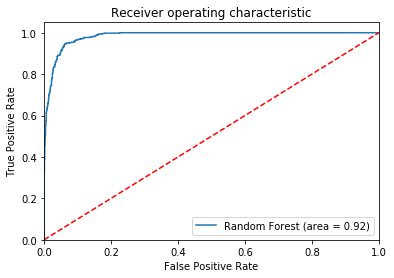

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1089   40]
 [  74  404]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


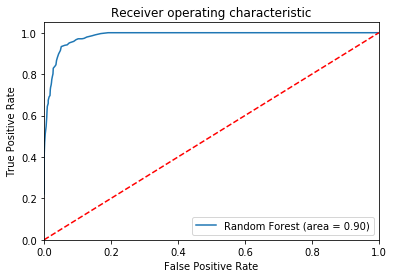

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1089   40]
 [  74  404]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


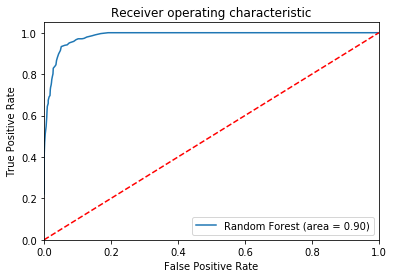

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1089   40]
 [  74  404]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


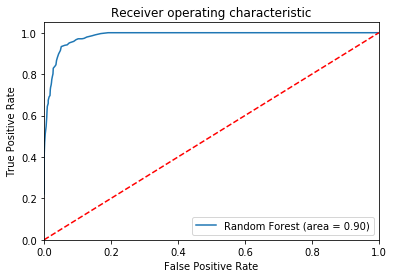

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1089   40]
 [  74  404]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


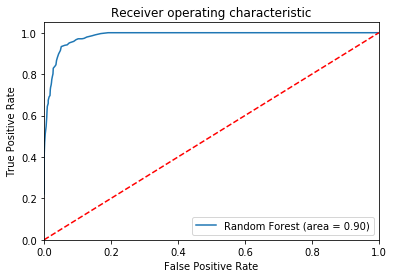

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[772 357]
 [ 75 403]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.68      0.78      1129
          1       0.53      0.84      0.65       478

avg / total       0.80      0.73      0.74      1607

ROC CURVE


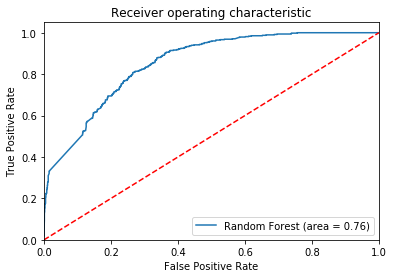

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1072   57]
 [  65  413]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.95      1129
          1       0.88      0.86      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


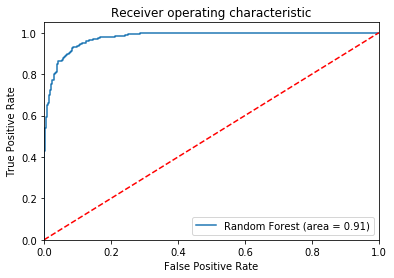

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1095   34]
 [  82  396]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


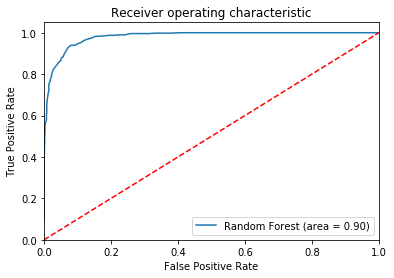

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1095   34]
 [  82  396]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


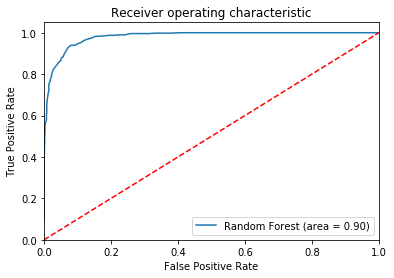

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1095   34]
 [  82  396]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


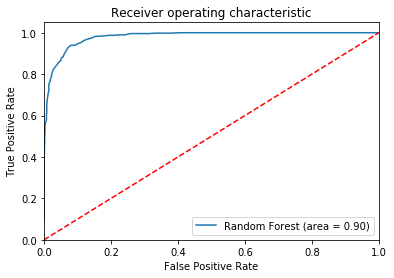

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1095   34]
 [  82  396]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


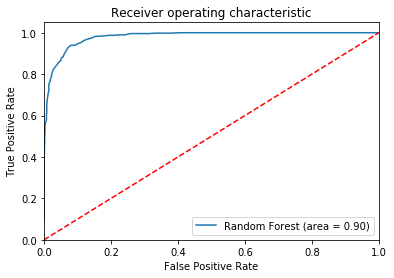

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[772 357]
 [ 75 403]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.68      0.78      1129
          1       0.53      0.84      0.65       478

avg / total       0.80      0.73      0.74      1607

ROC CURVE


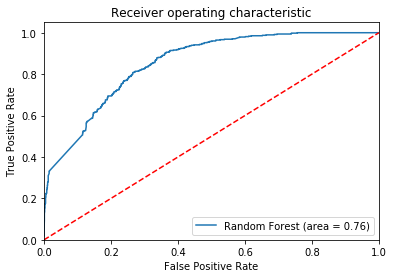

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1072   57]
 [  65  413]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.95      1129
          1       0.88      0.86      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


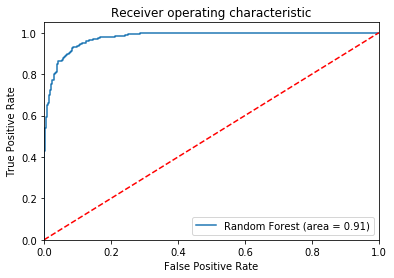

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1095   34]
 [  82  396]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


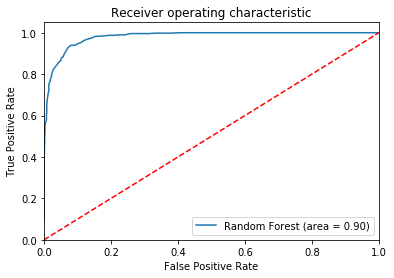

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1095   34]
 [  82  396]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


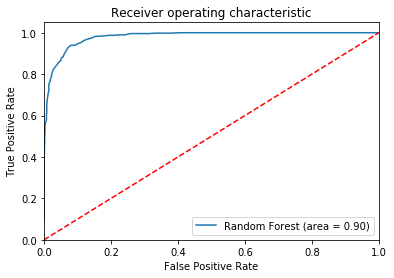

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1095   34]
 [  82  396]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


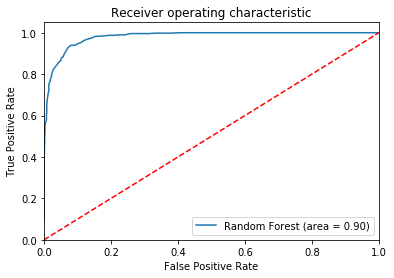

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1095   34]
 [  82  396]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


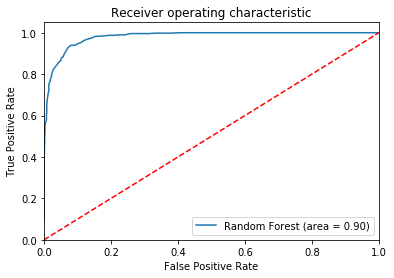

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[784 345]
 [ 72 406]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.69      0.79      1129
          1       0.54      0.85      0.66       478

avg / total       0.80      0.74      0.75      1607

ROC CURVE


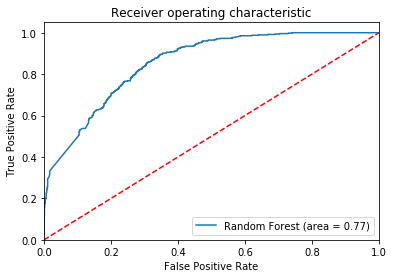

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1067   62]
 [  61  417]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.87      0.87      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


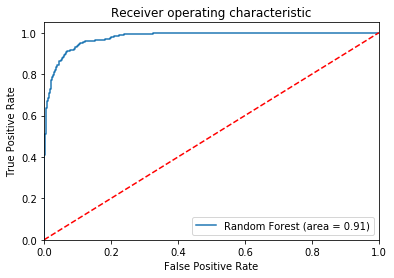

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1089   40]
 [  79  399]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.91      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


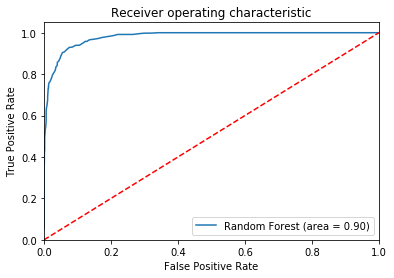

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1089   40]
 [  79  399]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.91      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


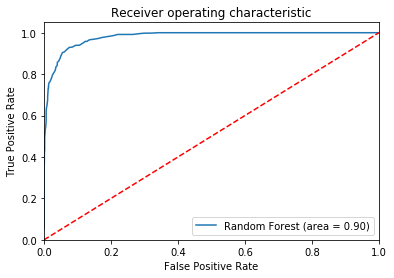

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1089   40]
 [  79  399]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.91      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


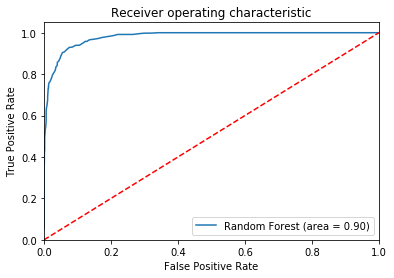

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1089   40]
 [  79  399]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.91      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


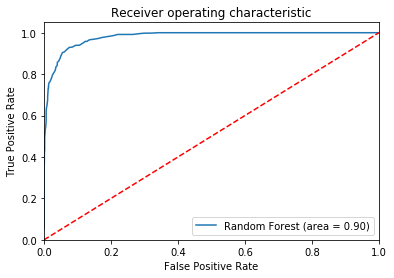

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[827 302]
 [100 378]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.73      0.80      1129
          1       0.56      0.79      0.65       478

avg / total       0.79      0.75      0.76      1607

ROC CURVE


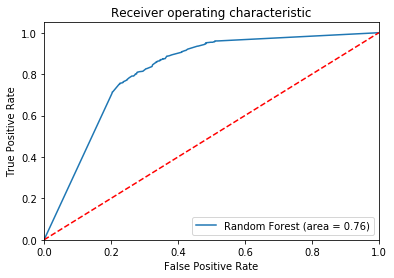

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1082   47]
 [  49  429]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      1129
          1       0.90      0.90      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


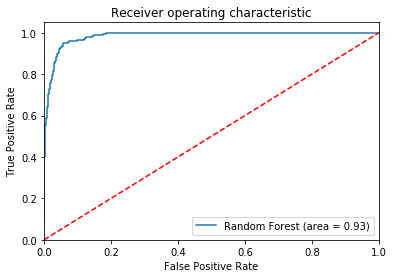

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1091   38]
 [  68  410]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.92      0.86      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


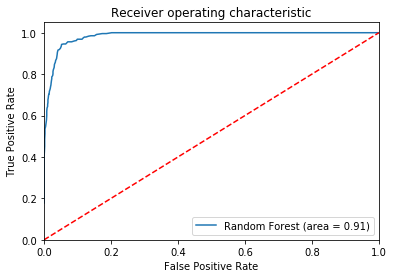

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1091   38]
 [  68  410]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.92      0.86      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


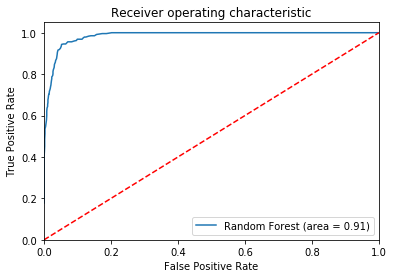

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1091   38]
 [  68  410]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.92      0.86      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


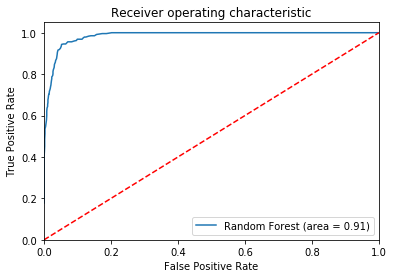

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1091   38]
 [  68  410]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.92      0.86      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


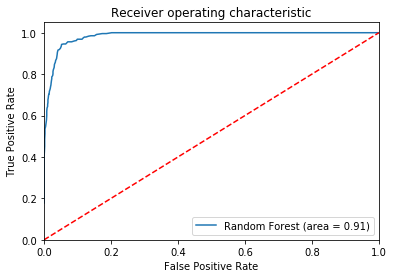

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[775 354]
 [ 78 400]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.69      0.78      1129
          1       0.53      0.84      0.65       478

avg / total       0.80      0.73      0.74      1607

ROC CURVE


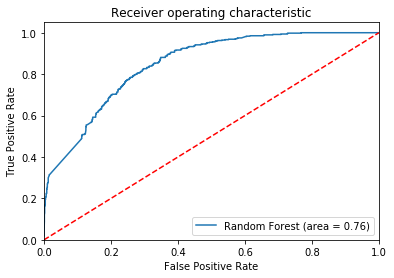

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1078   51]
 [  62  416]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.89      0.87      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


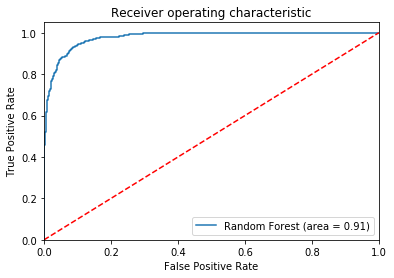

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1094   35]
 [  81  397]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


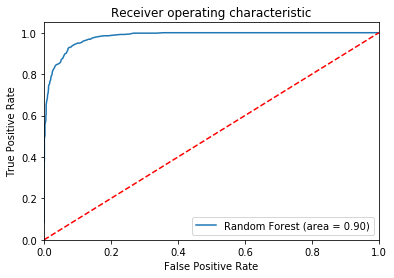

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1094   35]
 [  81  397]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


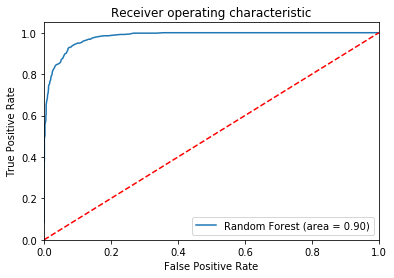

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1094   35]
 [  81  397]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


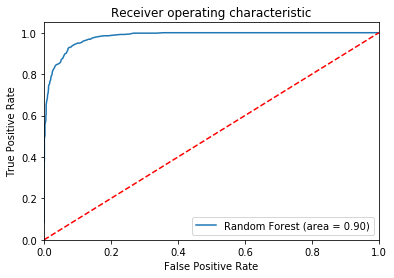

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1094   35]
 [  81  397]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


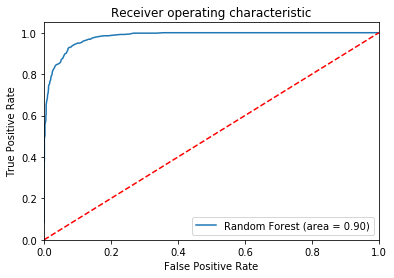

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[775 354]
 [ 78 400]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.69      0.78      1129
          1       0.53      0.84      0.65       478

avg / total       0.80      0.73      0.74      1607

ROC CURVE


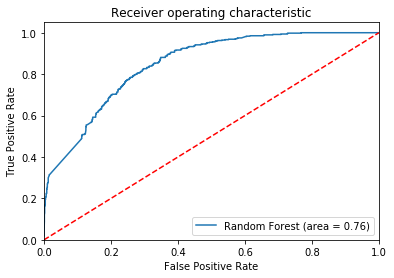

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1078   51]
 [  62  416]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.89      0.87      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


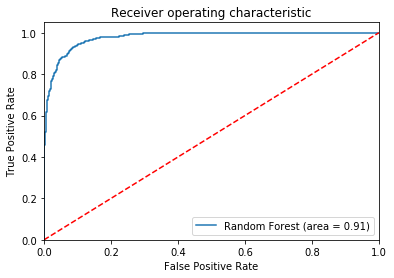

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1094   35]
 [  81  397]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


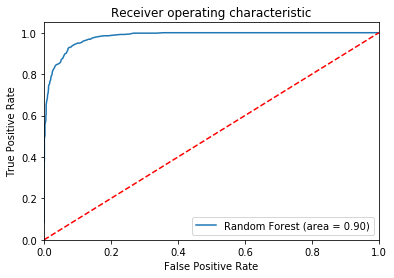

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1094   35]
 [  81  397]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


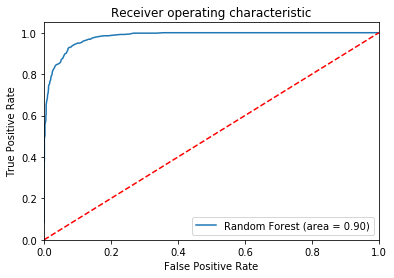

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1094   35]
 [  81  397]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


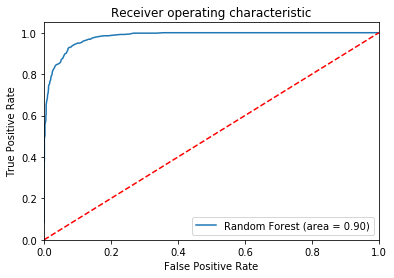

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1094   35]
 [  81  397]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.83      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


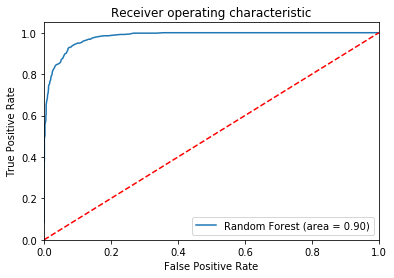

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[777 352]
 [ 79 399]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.69      0.78      1129
          1       0.53      0.83      0.65       478

avg / total       0.80      0.73      0.74      1607

ROC CURVE


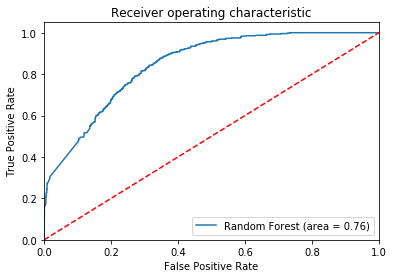

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1065   64]
 [  59  419]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.94      0.95      1129
          1       0.87      0.88      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


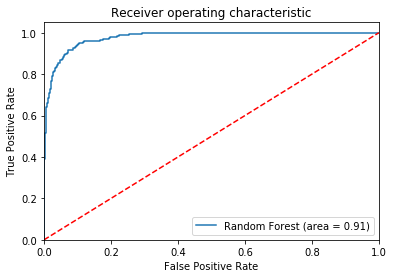

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1088   41]
 [  78  400]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.91      0.84      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


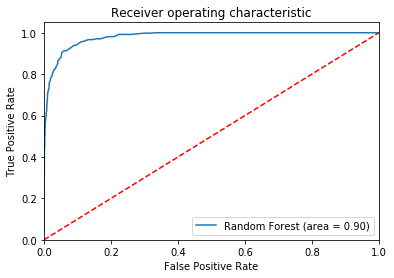

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1088   41]
 [  78  400]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.91      0.84      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


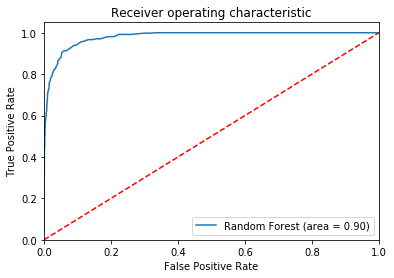

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1088   41]
 [  78  400]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.91      0.84      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


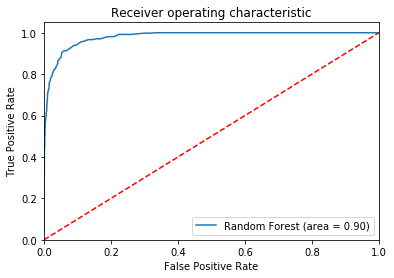

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1088   41]
 [  78  400]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.91      0.84      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


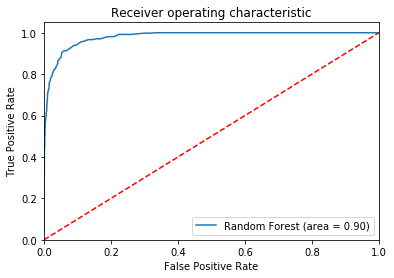

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[829 300]
 [100 378]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.73      0.81      1129
          1       0.56      0.79      0.65       478

avg / total       0.79      0.75      0.76      1607

ROC CURVE


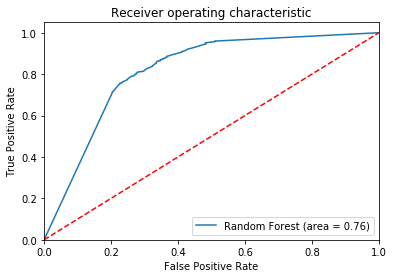

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1080   49]
 [  48  430]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      1129
          1       0.90      0.90      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


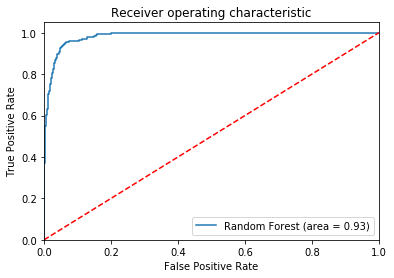

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1089   40]
 [  68  410]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


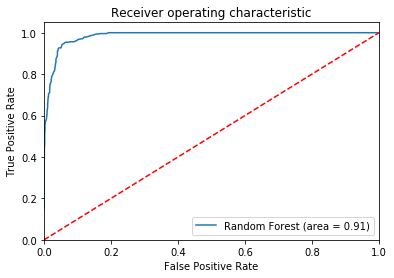

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1089   40]
 [  68  410]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


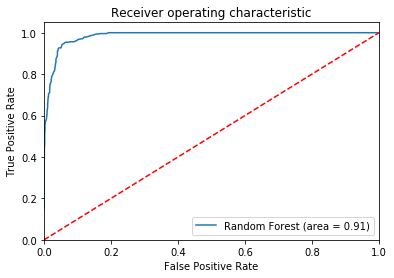

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1089   40]
 [  68  410]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


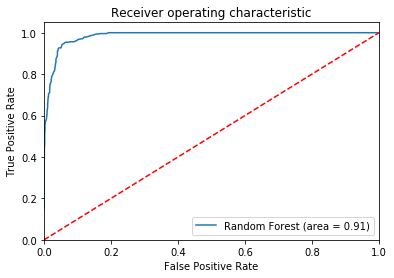

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1089   40]
 [  68  410]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


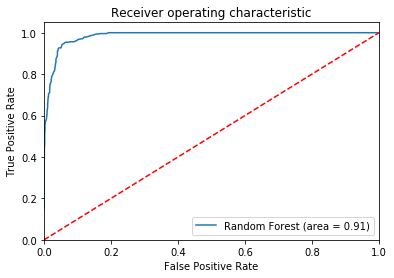

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
180.89185579676246


In [29]:
#Find optimal parameters
start_time = timeit.default_timer()
for i in Estimators:
    for j in maxFeatures:
        for k in maxDepth:
            hyperparameterTuneRandomForest(i,j,k,X_train_selected,y_train,X_validation_selected,y_validation)
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)            

### Random Forest

###### OPTIMAL PARAMETERS
###### Estimators = 100 ----   max features = None   ---------     Max depth = 10
###### Execution time (180.892 seconds)


# XGBoost with Cross Validation

In [30]:
#HYPER PARAMETER TUNE
depthMax = [1,2,3,4,5]
learningRate = [0.1,0.05,0.01] 
estimators = [50,100,150,200]

In [31]:
def hyperparameterTuneXGBoost(i,j,k,X_train,y_train,X_test,y_test):

    XGBModel = XGBClassifier(max_depth=i,learning_rate=j, n_estimators=k,random_state=123)
    XGBModel.fit(X_train, y_train)

    y_pred = XGBModel.predict(X_test)

    # evaluate predictions
    print("  Max Depth =" + str(i) + "          Learning Rate =" + str(j) + "         Estimators =" + str(k) )


    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, XGBModel.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, XGBModel.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    return

  Max Depth =1          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1099   30]
 [ 190  288]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.97      0.91      1129
          1       0.91      0.60      0.72       478

avg / total       0.87      0.86      0.85      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


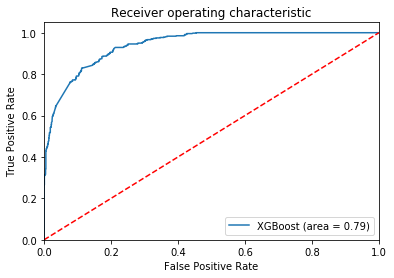

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1087   42]
 [ 126  352]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.74      0.81       478

avg / total       0.90      0.90      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


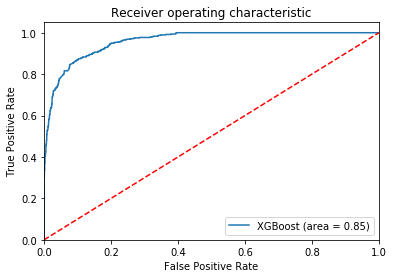

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1088   41]
 [  94  384]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.80      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


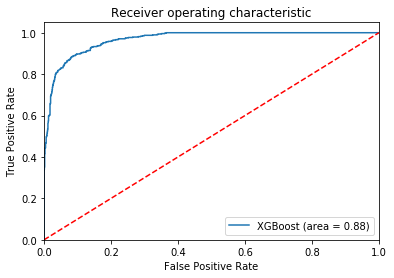

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1087   42]
 [  86  392]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.94      1129
          1       0.90      0.82      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


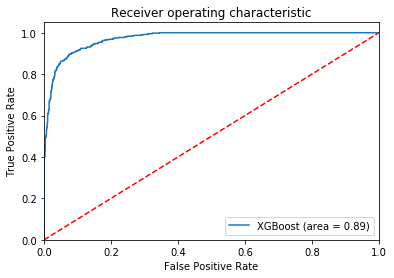

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1106   23]
 [ 258  220]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      0.98      0.89      1129
          1       0.91      0.46      0.61       478

avg / total       0.84      0.83      0.80      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


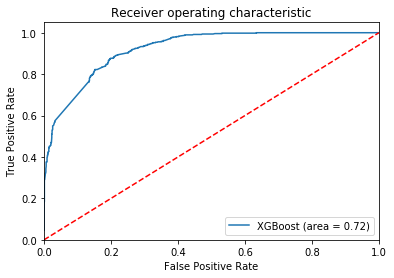

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1103   26]
 [ 193  285]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.98      0.91      1129
          1       0.92      0.60      0.72       478

avg / total       0.87      0.86      0.85      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


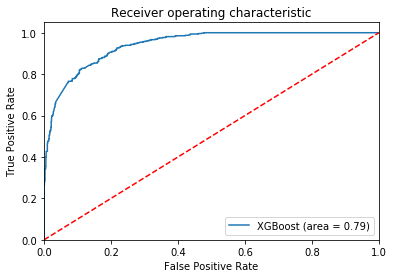

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1094   35]
 [ 142  336]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.97      0.93      1129
          1       0.91      0.70      0.79       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


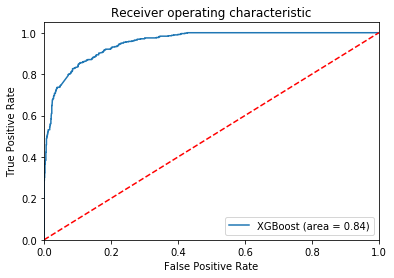

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1093   36]
 [ 126  352]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.91      0.74      0.81       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


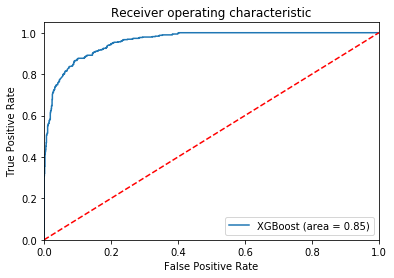

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1111   18]
 [ 313  165]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.78      0.98      0.87      1129
          1       0.90      0.35      0.50       478

avg / total       0.82      0.79      0.76      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


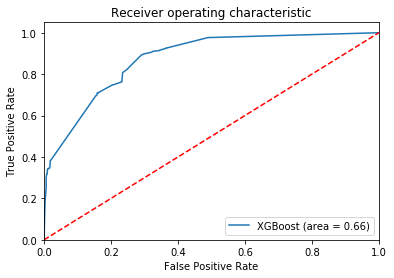

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1114   15]
 [ 297  181]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.79      0.99      0.88      1129
          1       0.92      0.38      0.54       478

avg / total       0.83      0.81      0.78      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


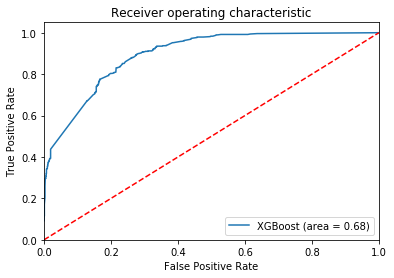

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1113   16]
 [ 292  186]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.79      0.99      0.88      1129
          1       0.92      0.39      0.55       478

avg / total       0.83      0.81      0.78      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


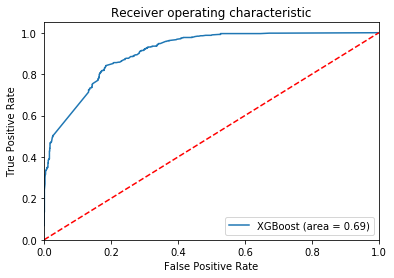

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1111   18]
 [ 274  204]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.98      0.88      1129
          1       0.92      0.43      0.58       478

avg / total       0.84      0.82      0.79      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


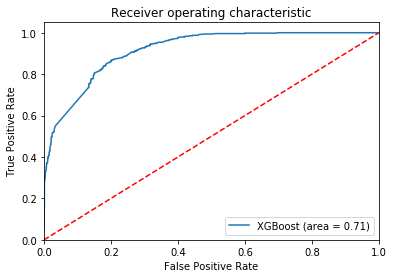

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1094   35]
 [  86  392]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.92      0.82      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


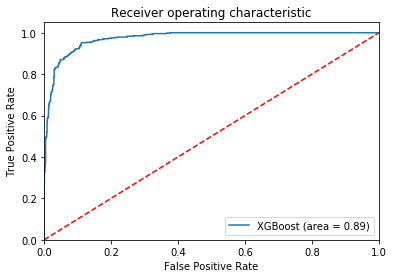

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1093   36]
 [  64  414]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.96      1129
          1       0.92      0.87      0.89       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


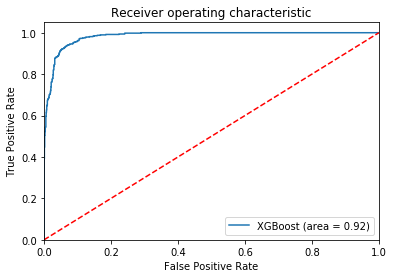

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1092   37]
 [  55  423]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


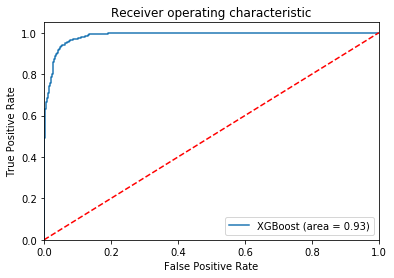

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1089   40]
 [  54  424]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1129
          1       0.91      0.89      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


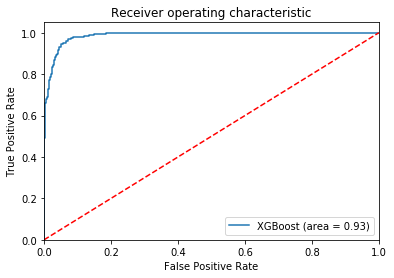

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1084   45]
 [ 116  362]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


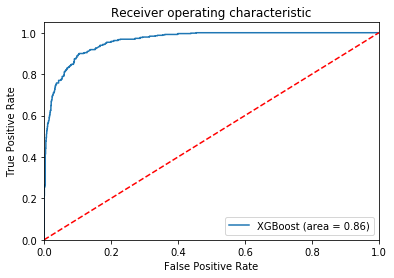

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1092   37]
 [  87  391]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.91      0.82      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


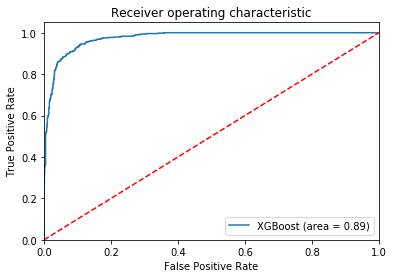

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1092   37]
 [  69  409]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.92      0.86      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


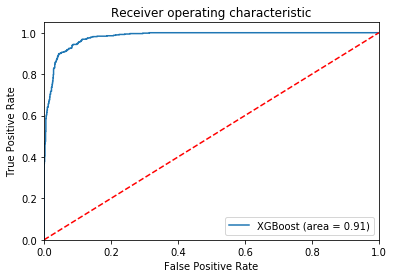

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1091   38]
 [  64  414]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.96      1129
          1       0.92      0.87      0.89       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


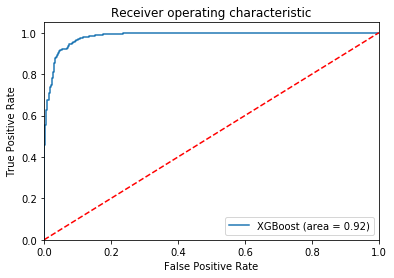

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1046   83]
 [ 148  330]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      1129
          1       0.80      0.69      0.74       478

avg / total       0.85      0.86      0.85      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


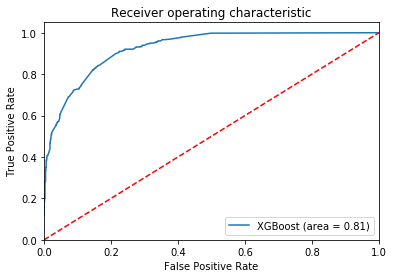

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1055   74]
 [ 143  335]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.93      0.91      1129
          1       0.82      0.70      0.76       478

avg / total       0.86      0.86      0.86      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


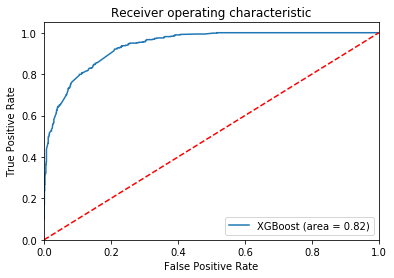

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1071   58]
 [ 138  340]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.95      0.92      1129
          1       0.85      0.71      0.78       478

avg / total       0.88      0.88      0.87      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


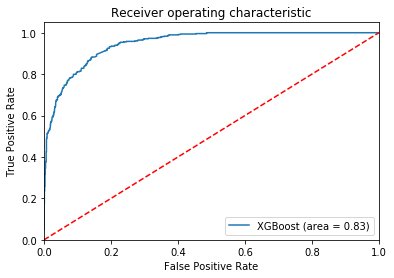

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1079   50]
 [ 127  351]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.96      0.92      1129
          1       0.88      0.73      0.80       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


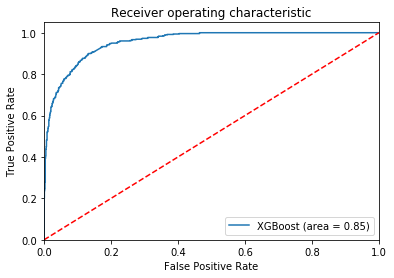

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1088   41]
 [  66  412]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.86      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


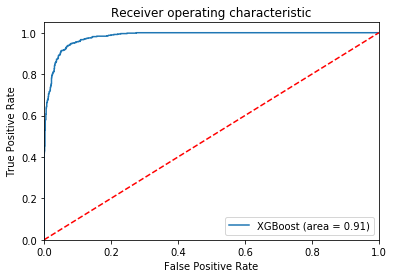

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1094   35]
 [  51  427]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.89      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


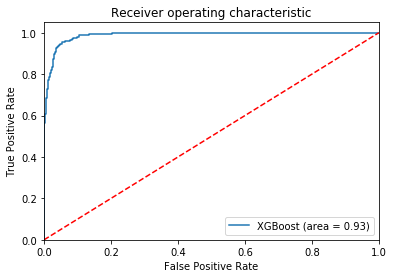

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1095   34]
 [  50  428]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.93      0.90      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


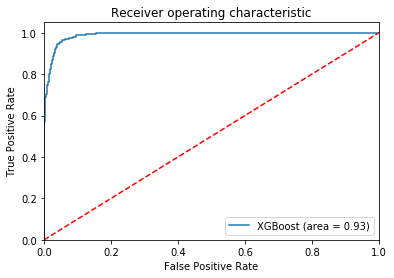

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1098   31]
 [  45  433]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1129
          1       0.93      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


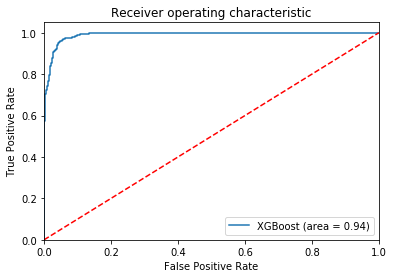

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1075   54]
 [  77  401]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.88      0.84      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


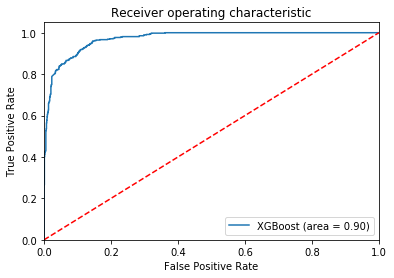

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1091   38]
 [  66  412]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.92      0.86      0.89       478

avg / total       0.93      0.94      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


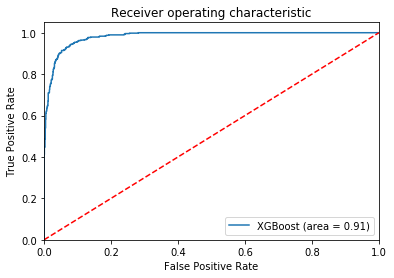

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1090   39]
 [  57  421]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


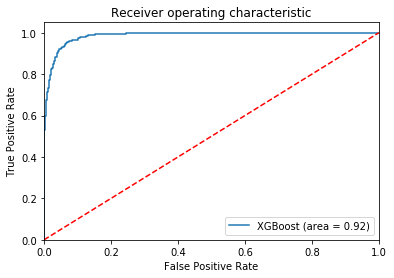

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1094   35]
 [  51  427]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.89      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


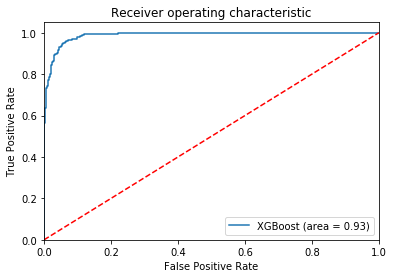

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1049   80]
 [ 103  375]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.93      0.92      1129
          1       0.82      0.78      0.80       478

avg / total       0.88      0.89      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


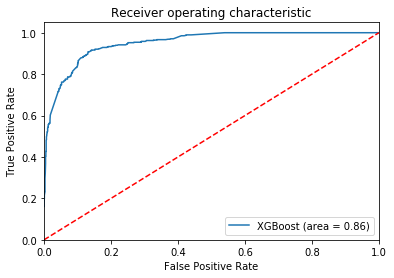

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1057   72]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.94      0.93      1129
          1       0.84      0.81      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


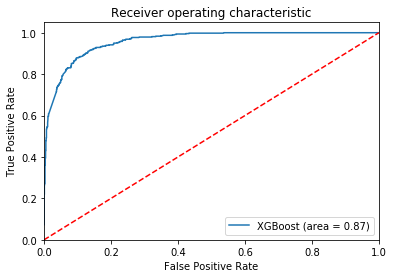

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1058   71]
 [  88  390]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.94      0.93      1129
          1       0.85      0.82      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


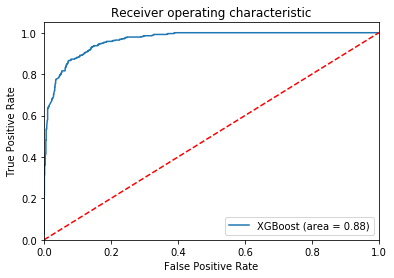

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1073   56]
 [  83  395]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.88      0.83      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


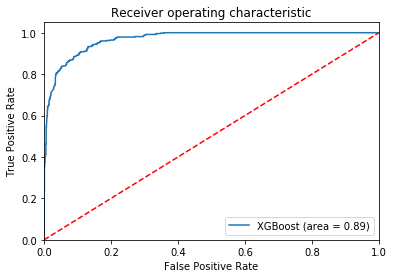

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1092   37]
 [  57  421]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


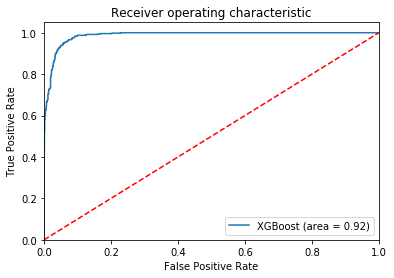

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1095   34]
 [  46  432]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.93      0.90      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


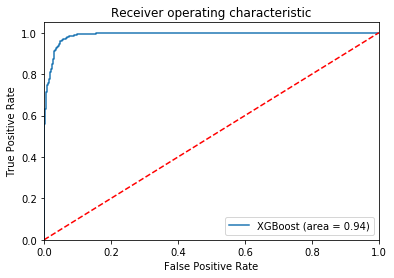

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1096   33]
 [  47  431]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.93      0.90      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


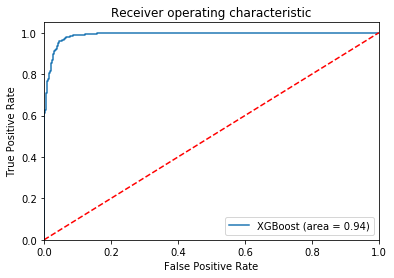

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1095   34]
 [  43  435]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1129
          1       0.93      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


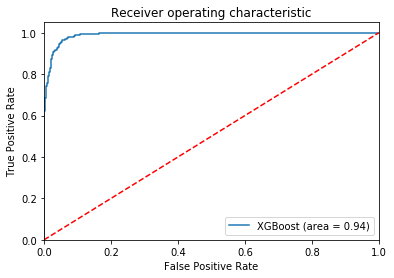

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1091   38]
 [  66  412]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.92      0.86      0.89       478

avg / total       0.93      0.94      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


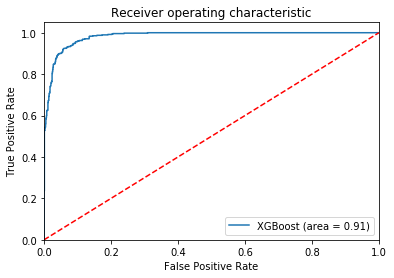

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1096   33]
 [  56  422]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.93      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


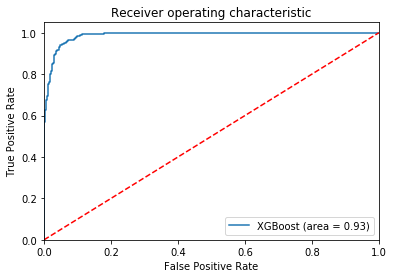

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1097   32]
 [  54  424]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.93      0.89      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


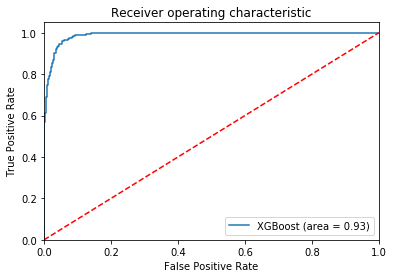

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1094   35]
 [  51  427]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.89      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


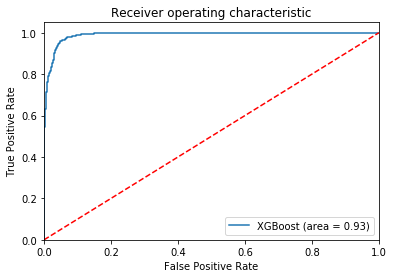

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1069   60]
 [  92  386]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      1129
          1       0.87      0.81      0.84       478

avg / total       0.90      0.91      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


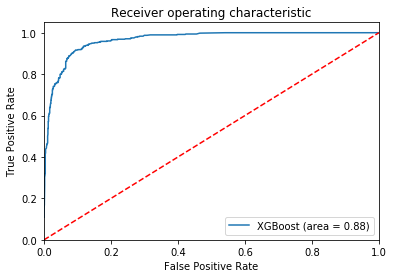

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1084   45]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


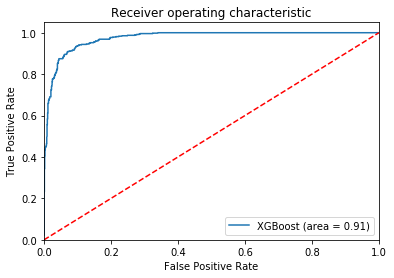

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1088   41]
 [  68  410]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


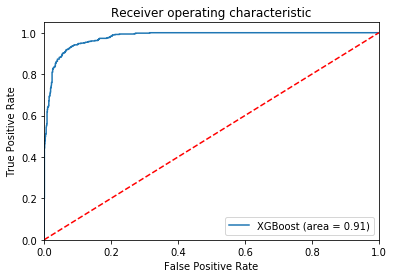

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1089   40]
 [  64  414]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.87      0.89       478

avg / total       0.93      0.94      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


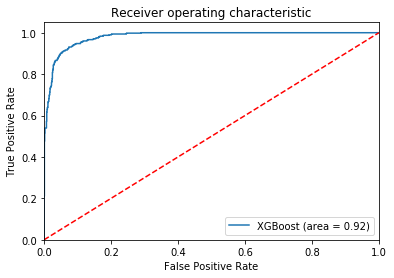

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1091   38]
 [  52  426]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.89      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


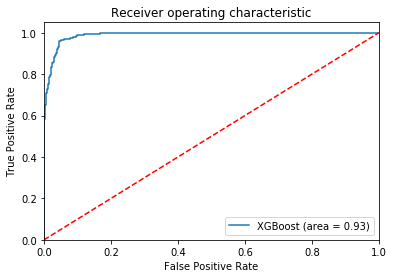

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1090   39]
 [  44  434]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.91      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


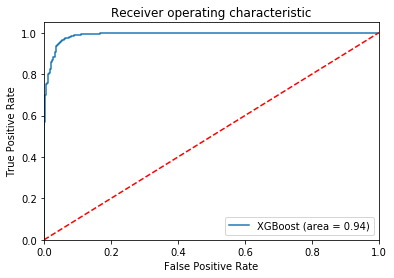

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1091   38]
 [  43  435]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.91      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


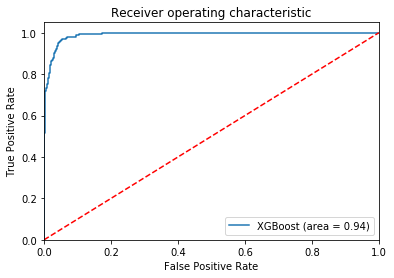

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1092   37]
 [  43  435]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


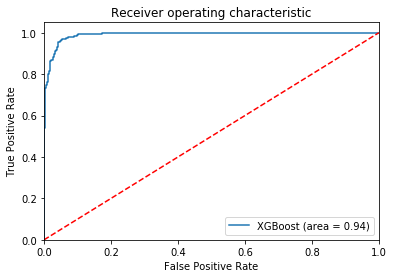

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1090   39]
 [  58  420]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


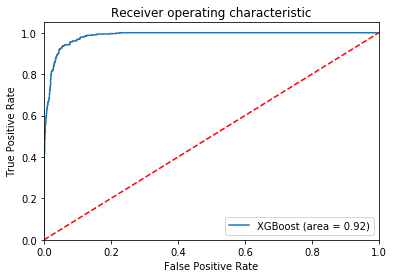

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1092   37]
 [  51  427]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.89      0.91       478

avg / total       0.94      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


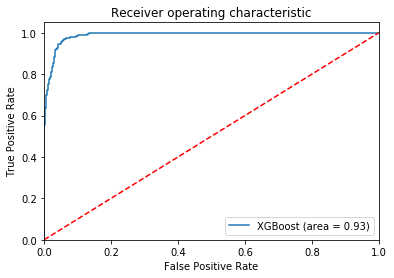

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1091   38]
 [  46  432]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.90      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


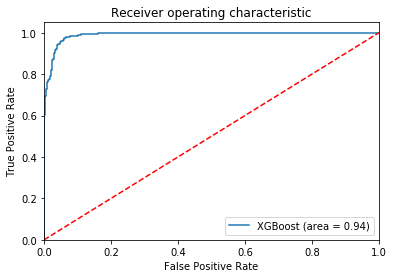

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1092   37]
 [  42  436]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1129
          1       0.92      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


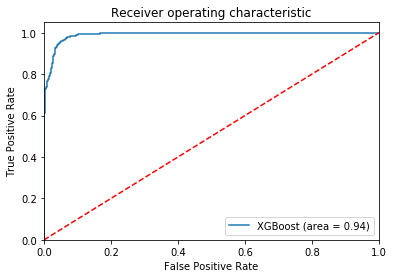

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1067   62]
 [  79  399]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.87      0.83      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


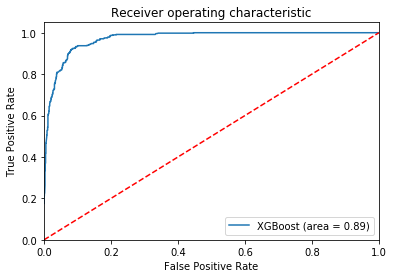

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1081   48]
 [  70  408]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.89      0.85      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


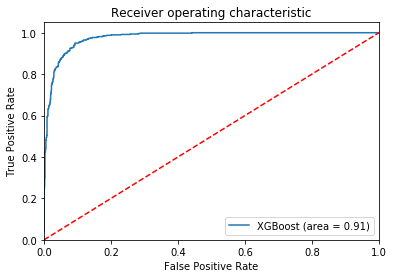

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1085   44]
 [  65  413]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


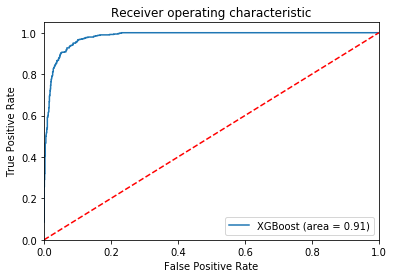

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1087   42]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.91      0.87      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


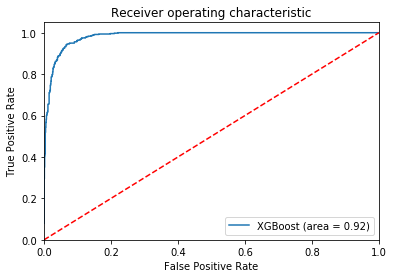

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
85.02311251163053


In [32]:
start_time = timeit.default_timer()
for i in depthMax:
    for j in learningRate:
        for k in estimators:
            hyperparameterTuneXGBoost(i,j,k,X_train_selected,y_train,X_validation_selected,y_validation)
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)  

### XGBOOST

###### OPTIMAL PARAMETERS
###### #Max Depth =3 --------     Learning Rate =0.1    ----------     Estimators =200
###### Execution time 85.023 seconds)


# Test on Unseen Data with optimal hyperparameters

## Logistic Regression

        C =0.001          Maximum Iterations =50
CONFUSION MATRIX:   
[[1029   67]
 [  21  490]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1096
          1       0.88      0.96      0.92       511

avg / total       0.95      0.95      0.95      1607

ROC CURVE


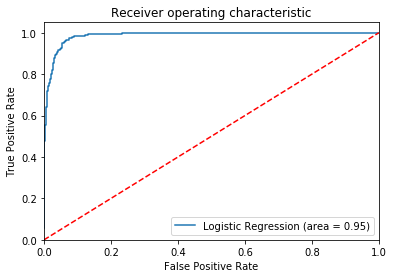

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [34]:
hyperparameterTuneLogistic(0.001,50,X_train_selected,y_train,X_test_selected,y_test)

## Random Forest

  Estimators =100          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1029   67]
 [  46  465]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.94      0.95      1096
          1       0.87      0.91      0.89       511

avg / total       0.93      0.93      0.93      1607

ROC CURVE


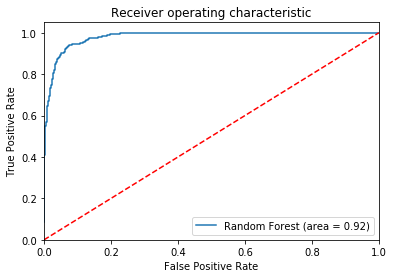

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [35]:
hyperparameterTuneRandomForest(100,None,10,X_train_selected,y_train,X_test_selected,y_test)

## XGBoost

  Max Depth =3          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1049   47]
 [  54  457]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1096
          1       0.91      0.89      0.90       511

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


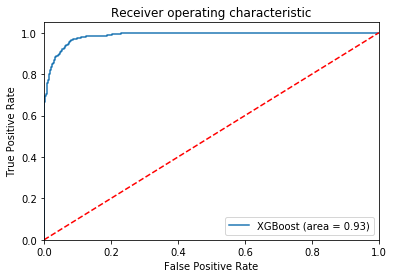

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [36]:
hyperparameterTuneXGBoost(3,0.1,200,X_train_selected,y_train,X_test_selected,y_test)